<div style="border:solid green 3px; padding: 20px"><b>✅Комментарий ревьюера:</b>
    
<b>🥇 Таника, проект принят, молодец!</b>
    
💚Мне очень понравился твой проект, это настоящее, полноценное исследование! Очень увлекательное, с наглядными визуализациями и интересными выводами. Оформление прекрасное! Ты двигаешься в правильном направлении и у тебя есть необходимые способности. Уверен, ты обязательно достигнешь своей цели! Успехов в дальнейшем обучении! 🙂    

# Изучение рынка компьютерных игр

<font color='navy' size=4>**Описание проекта**</font>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. 

*Данные за 2016 год могут быть неполными.*

<font color='navy' size=4>**Цели исследования**</font>

Цели данного исследования можно разделить на две составляющих:

- поиск наиболее популярных продуктов (компьютерных игр и платформ) на основе данных за 36 лет, но в перспективе на ближайшее время;
- поиск параметров, которые влияют на успешность игр.

В зависимости от результатов решить, в какой продукт и в какую рекламную компанию стоит вкладываться в следующем году, а продажу каких игр стоит уменьшить.



<font color='navy' size=4>**Ход исследования**</font>

1. Подготовить данные к изучению.
2. Провести исследовательский анализ:
    - выявить наиболее перспективные в ближайшее время платформы;
    - определить игры каких жанров являются наиболее продаваемыми;
    - проверить, что влияет в регионах на популярность жанров и платформ;
    - выяснить, зависит ли успешная продажа игр от оценок критиков и пользователей, и если зависит, то каким образом и насколько сильно; 
    - также исследовать влияние рейтинга на популярность игр.
3. На основе выбранных платформ и игр построить и проверить гипотезы, чтобы убедиться в правильности выбора.
    

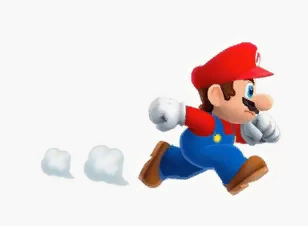
## Общая информация

### <font color='navy'>Чтение данных</font>

In [1]:
# подключим библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

# прочитаем файл с данными
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    try:
        df = pd.read_csv('games.csv')
    except: 
        df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
        
# выведем на экран несколько строк
df.sample(7)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9466,Zoobles! Spring to Life!,DS,2011.0,Misc,0.10,0.02,0.00,0.01,NaN,NaN,NaN
12821,Samurai Warriors 4: Empires,PSV,2015.0,Action,0.00,0.00,0.06,0.00,NaN,tbd,T
679,Resident Evil - Code: Veronica X,PS2,2001.0,Action,1.08,0.70,0.34,0.21,84.0,8.4,M
5370,Super Bust-A-Move,PS2,2000.0,Puzzle,0.17,0.13,0.00,0.04,75.0,tbd,E
13980,Taikou Risshiden V,PSP,2009.0,Strategy,0.00,0.00,0.04,0.00,NaN,NaN,NaN
5866,Magna Carta 2,X360,2009.0,Role-Playing,0.13,0.07,0.07,0.02,69.0,7,T
101,Battlefield 3,X360,2011.0,Shooter,4.46,2.11,0.06,0.69,84.0,7.4,M


### <font color='navy'>Описание данных</font>

In [2]:
df.info()

# переведём названия столбцов в нижний регистр
df.columns = df.columns.str.lower()

# переименуем year_of_release - слишком длинно
df = df.rename(columns={'year_of_release': 'year'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


-	`name` — название игры
-	`platform` — платформа
-	`year` — год выпуска
-	`genre` — жанр игры
-	`na_sales` — продажи в Северной Америке (миллионы проданных копий)
-	`eu_sales` — продажи в Европе (миллионы проданных копий)
-	`jp_sales` — продажи в Японии (миллионы проданных копий)
-	`other_sales` — продажи в других странах (миллионы проданных копий)
-	`critic_score` — оценка критиков (максимум 100)
-	`user_score` — оценка пользователей (максимум 10)
-	`rating` — рейтинг от организации ESRB  

## Предобработка данных

Для удобства работы с данными, создадим две переменные - списки, куда сохраним имена столбцов нашего датафрейма, которые часто будут нужны вместе:
- `game_list` - список, однозначно определяющий одну и ту же игру (название, платформа, год выпуска и жанр);
- `sales_list` - количества продаж по разным частям света.

In [3]:
game_list = ['name', 'platform', 'year', 'genre']
sales_list = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

### <font color='navy'>Поиск пропущенных значений</font>

In [4]:
df.isna().sum().to_frame().style.hide(axis=1).background_gradient('Blues')

name,2
platform,0
year,269
genre,2
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8578
user_score,6701
rating,6766


- Пропуски для *года и названия* скорее всего - ошибки технического характера, возникшие, например, при выгрузке данных из разных источников. 


- *Оценки и рейтинг* могут отстутствовать  для старых или непопулярных игр. Возможно также эти данные собирались не по всем странам или регионам. Скорее всего, в Америке и Европе рейтинги и оценки появились раньше и использовались активнее. 

Чтобы анализировать и сравнивать два столбца с оценками лучше, конечно, избавиться от пропусков и перевести эти столбцы в целочисленный формат.

#### Названия игр (`name`)

Две игры прячут своё имя. Посмотрим сначала на эти строки.

In [5]:
display(df[df['name'].isna()])

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Здесь никаких выводов не сделать - ни названия, ни жанра, ни рейтингов.  Но мы заодно нашли две строки, в которых не указан жанр `genre`. Удалим эти записи.

In [6]:
# оставим в датафрейме только непустые значения поля name
df = df[df['name'].notna()]

#### Год выпуска игр (`year`)

<b>1) Если год не указан, но содержится в названии игры</b>

В ходе работы с данными, было замечено, что среди строк встречаются такие, где год указан в названии. В основном это спортивные игры. Проверим.

In [7]:
print('В таблице содержатся данные за\033[1m', int(df['year'].min()), 
      '-', int(df['year'].max()), '\033[0mгг.')
print('Количество строк, где год возможно записан в имени:\033[1m', 
     df[(df['name'].str.contains('20')) & 
        (df['year'].isna())]['name'].count(), '\033[0m')

# выведем на экран все строки, где пропущен год, а имя содержит 20
display(df[(df['name'].str.contains('20')) & (df['year'].isna())].sample(5))

'''
# убедимся, что таких игр не было в прошлом веке :))
display(df[(df['name'].str.contains('19')) & (df['year'].isna())])

# это "рабочая строка" для проверки пропущенного года среди похожих значений
display(df[df['name'].str.contains('NBA Live')].sort_values(by='name'))
''';

В таблице содержатся данные за 1980 - 2016 гг.
Количество строк, где год возможно записан в имени: 19 


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.0,0.03,90.0,8.1,E
13195,Tour de France 2011,X360,NaN,Racing,0.00,0.04,0.0,0.01,46.0,7.6,NaN
6954,Jet X20,PS2,NaN,Racing,0.11,0.09,0.0,0.03,NaN,NaN,NaN
15953,PDC World Championship Darts 2008,DS,NaN,Sports,0.01,0.00,0.0,0.00,NaN,NaN,NaN
2492,MLB SlugFest 20-03,PS2,NaN,Sports,0.41,0.32,0.0,0.11,77.0,8.2,E


Год, указанный в названии большинства спортивных игр на единицу больше, чем год выпуска игры. Т.е. спортивные игры выпускали заранее. Но кроме года в названии может содержаться и просто число 20. Заполним пропуски где это возможно. Учтём, что до 2000 года таких данных не попадалось, а максимальный год 2016.

In [8]:
# ищем все пропущенные значения, где в имени указан год
for year in range(2000, 2017):
    # заменяем такие пропуски на значение года на 1 меньше
    df['year'] = df['year'].mask(
                (df['name'].str.contains(str(year))) & (df['year'].isna()), 
                year-1)

# выведем на экран все оставшиеся строки, где пропущен год, а имя содержит 20
display(df[(df['name'].str.contains('20')) & (df['year'].isna())])

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2492,MLB SlugFest 20-03,PS2,NaN,Sports,0.41,0.32,0.0,0.11,77.0,8.2,E
6954,Jet X20,PS2,NaN,Racing,0.11,0.09,0.0,0.03,NaN,NaN,NaN


In [9]:
'''
# проверка для первой строки
display(df[df['name'].str.contains('SlugFest')].sort_values(by='name'))
'''

# заменим значения и для 20-03
df.loc[(df['name'].str.contains('20-03')) & (df['year'].isna()), 'year'] = 2002

<b>2) Если год можно установить по серии игр</b>

В ходе изучения таблицы, было замечено, что среди строк с пропусками есть известные игры из серий `Индиана Джонс`, `GTA`, `Lego` и т.п. Большинство этих игр выпускались одновременно на многих платформах к выходу очередного фильма, например.

Проверим это. И если в такой группе игр будет содержаться один год выпуска и разные платформы - заменим пропущенные значения. Не стоит делать этого для групп, где меньше трёх игр разных платформ, так как могут существовать ремейки.

In [10]:
'''
# изучим группы с одинаковыми именами, среди которых встречаются записи без года
# n_rows_min - количество строк в группе
# это значение можно менять - чем оно больше, тем меньше количество таких групп
n_rows_min = 5 

# цикл по всем уникальным значениям name, для которых год в данных пропущен
for find_name in df[df['year'].isna()]['name'].unique():
    # выведем на экран строки датафрейма с такими именами
    if df.query('name==@find_name')['name'].count() > n_rows_min:
        display(df.query('name==@find_name'))
'''

# создадим список, куда сохраним названия игр, для которых не получится сделать замену пропущенных значений
no_year_names = []

# цикл по всем уникальным значениям name, для которых год в данных пропущен
for find_name in df[df['year'].isna()]['name'].unique():
    
    # cохраним срез в датафрейм, включим в срез название игры, платформу и год
    # название игры - find_name из цикла
    df_find_name = df.query('name==@find_name')[['platform', 'year']]
    
    # создадим условие для проверки, чтобы облегчить чтение кода
    # если количество строк больше двух
    check = len(df_find_name) > 2
    # если количество разных платформ больше двух
    check &= df_find_name['platform'].nunique() > 2
    # если не все значения года пропущены
    check &= df_find_name['year'].isna().sum != len(df_find_name)
    
    # если эти условия выполняются, то проверим дальше
    # (вторая проверка нужна, так как не все названия будем добавлять в список)
    if check:
        # если в этих строках только один год выпуска или 
        # два разных года выпуска, но отличаются они только на единицу
        check &= df_find_name['year'].nunique() == 1 or \
                (df_find_name['year'].nunique() == 2 and \
                 df_find_name['year'].max() - \
                 df_find_name['year'].min() ==1)
    
        if check: 
             # заменим в большом датафрейме пропуски в годе выпуска для игры find_name
            df['year'] = df ['year'].mask(
                (df['name'] == find_name) & (df['year'].isna()), 
                 df_find_name['year'].max())
        
        # если заменить не получилось, но первые условия выполняются - сохраним название игры в список
        else:
            no_year_names.append(find_name)
            
print('Не удалось заполнить значения в\033[1m', len(no_year_names), '\033[0mгруппах игр с одинаковым названием:')

for find_name in no_year_names:
    # выведем на экран строки датафрейма с такими именами
    display(df.query('name==@find_name'))            

Не удалось заполнить значения в 7 группах игр с одинаковым названием:


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,Space Invaders,SNES,1994.0,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,Space Invaders,N64,1999.0,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10383,Space Invaders,GBA,2002.0,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T
1840,Rock Band,PS2,NaN,Misc,0.71,0.06,0.0,0.35,82.0,6.8,T


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1577,Wheel of Fortune,PS,1998.0,Misc,0.99,0.22,0.0,0.04,NaN,NaN,NaN
2124,Wheel of Fortune,Wii,2010.0,Misc,0.86,0.04,0.0,0.06,NaN,7.6,E
2157,Wheel of Fortune,PS2,NaN,Misc,0.47,0.36,0.0,0.12,NaN,tbd,E
4662,Wheel of Fortune,DS,2010.0,Misc,0.39,0.00,0.0,0.03,NaN,tbd,E
6670,Wheel of Fortune,N64,1997.0,Misc,0.20,0.05,0.0,0.00,NaN,NaN,NaN


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2969,Test Drive Unlimited 2,X360,NaN,Racing,0.30,0.31,0.00,0.07,68.0,6.4,T
3233,Test Drive Unlimited 2,PS3,NaN,Racing,0.16,0.34,0.01,0.12,70.0,6.1,T
7735,Test Drive Unlimited 2,PC,NaN,Racing,0.05,0.11,0.00,0.03,72.0,5.7,T


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
1996,Sonic the Hedgehog,X360,2006.0,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11832,Smashing Drive,GC,NaN,Racing,0.06,0.01,0.0,0.0,47.0,5.2,T
14050,Smashing Drive,XB,2002.0,Racing,0.03,0.01,0.0,0.0,42.0,tbd,T
14559,Smashing Drive,GBA,2004.0,Racing,0.02,0.01,0.0,0.0,NaN,tbd,E


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
683,Mario Tennis,N64,2000.0,Sports,0.78,0.40,1.06,0.07,NaN,NaN,NaN
1711,Mario Tennis,GB,2000.0,Sports,0.50,0.18,0.44,0.06,NaN,NaN,NaN
12180,Mario Tennis,Wii,2010.0,Sports,0.00,0.06,0.00,0.01,NaN,tbd,E
15338,Mario Tennis,3DS,NaN,Sports,0.00,0.00,0.02,0.00,NaN,NaN,NaN


Что можно восстановить:
- `Rock Band` вышла в 2007 году сразу на нескольких платформах;
- `Wheel of Fortune` ремейк 2010 года на Play Station 2;
- `Test Drive Unlimited 2` 2011 год;
- помню как в Токио в 2006 вышла `Sonic the Hedgehog` и везде на улицах сидели синие ёжики!
- `Smashing Drive` - интернет говорит, что такие игры были созданы в 2000 году. Продажи небольшие, но сохраним и эти строки;
- `Mario Tennis` пишут, что вышел на 3DS в 2012. Очень низкие продажи для Марио в Японии. 

Заполним что нашли.

In [11]:
df['year'] = df ['year'].mask((df['year'].isna()) & (df['name'] == 'Rock Band'), 2007)
df['year'] = df ['year'].mask((df['year'].isna()) & (df['name'] == 'Wheel of Fortune'), 2010)
df['year'] = df ['year'].mask((df['year'].isna()) & (df['name'] == 'Test Drive Unlimited 2'), 2011)
df['year'] = df ['year'].mask((df['year'].isna()) & (df['name'] == 'Sonic the Hedgehog'), 2006)
df['year'] = df ['year'].mask((df['year'].isna()) & (df['name'] == 'Smashing Drive'), 2000)
df['year'] = df ['year'].mask((df['year'].isna()) & (df['name'] == 'Mario Tennis'), 2012)

print('Количество оставшихся пропущенных значений year:\033[1m', 
      df['year'].isna().sum(), '\033[0m')

Количество оставшихся пропущенных значений year: 171 


Других идей как заменить пропущенные значения нет. Таких данных немного, а в нашем исследовании год важен, так как нужно отследить динамику продаж для выводов и прогнозов на 2017 год. Удалим эти строки.

In [12]:
df = df.query('year.notnull()')

#### Оценки (`critic_score` и `user_score`)

Нельзя заменить оценки на значение из группы, как в случае с годами. Так как одна и та же игра на разных платформах может иметь абсолютно разные оценки. Например, удобно играть на одной приставке, но не хватает функциональности другой. Поэтому если нулевых значений в этих столбцах нет, можем заменить пропуски нулями, не исказив данные.

Столбец critic_score изначально имел тип данных `float64`, а user_score - тип `object`. Проверим, какие строки содержат не цифровые символы.

In [13]:
# посмотрим какие значения в столбце user_score не являются числовыми
print('Значения столбца user_score, которые содержат не только цифры:') 
print('\033[1m', *df[(df['user_score'].notna()) & \
         (pd.to_numeric(df['user_score'], errors='coerce').isnull())]\
                          ['user_score'].unique(), '\033[0m')

Значения столбца user_score, которые содержат не только цифры:
 tbd 


Много пропущенных значений и странные `tbd`, что оказывается означает  "to be determined" ("подлежит определению"). Эти значения также можно считать пропущенными.

In [14]:
print('Количество нулевых оценок критиков (до замены пропущенных значений):\033[1m', 
      df.query('critic_score==0 or critic_score=="0" or critic_score=="0.0"')['name'].count(), 
      '\033[0m')
print('Количество нулевых оценок пользователей (до замены пропущенных значений):\033[1m', 
      df.query('user_score==0 or user_score=="0" or user_score=="0.0"')['name'].count(), 
      '\033[0m')
print()
print('Количество строк с оценкой `tbd`:\033[1m', 
      df.query('user_score=="tbd"')['user_score'].count(), '\033[0m')

# посмотрим какую игру пользователи оценили на ноль
df.query('user_score == "0" or user_score == "0.0"')

Количество нулевых оценок критиков (до замены пропущенных значений): 0 
Количество нулевых оценок пользователей (до замены пропущенных значений): 1 

Количество строк с оценкой `tbd`: 2391 


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,NaN,0,E


Какой прелестный <font color='HotPink'>__Маленький Пони__</font> 🦄! Малыши просто не научились ещё проставлять оценки. Других нулевых оценок в двух столбцах больше не было. Думаю, мы не исказим данные, если заменим пропуски нулями. При анализе оценок будем исключать эти строки. Добавим в компанию к Пони наши пропущенные значения.

In [15]:
# заменим нулями пропуски
df['critic_score'] = df['critic_score'].fillna(0)
df['user_score'] = df['user_score'].fillna(0)
df['user_score'] = df['user_score'].mask(df['user_score']=='tbd', 0)

#### Рейтинг (`rating`)


In [16]:
display(df['rating'].value_counts().to_frame())

,rating
E,3953
T,2927
M,1549
E10+,1409
EC,8
K-A,3
RP,2
AO,1


Найдём что это значит с помощью Википедии:

- `EC` («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone».
- `E` («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально `K-A` ("Kids to Adults").
- `E10+` («Everyone 10 and older») — «Для всех от 10 лет и старше». Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.
- `T` («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. 
- `M` («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.
- `AO` («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры. Первой игрой, которая получила данный рейтинг, стала The Joy of Sex, выпущенная в 1993 году.
- `RP` («Rating Pending») — «Рейтинг ожидается». Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

Ну воот то `tbd`, то `RP`. И всего лишь одна строка со со страшным рейтингом `AO`.

In [17]:
'''
# проверка для игр с рейтингом АО, EC
display(df.query('name.str.contains("Grand Theft Auto: San Andreas")'))
display(df.query('rating=="EC"'))
'''

display(df.query('rating=="RP" | rating=="AO"'))    

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
875,Grand Theft Auto: San Andreas,XB,2005.0,Action,1.26,0.61,0.0,0.09,93.0,8.6,AO
14270,Supreme Ruler: Cold War,PC,2011.0,Strategy,0.00,0.03,0.0,0.01,63.0,6.8,RP
16180,WRC: FIA World Rally Championship,PC,2005.0,Racing,0.00,0.01,0.0,0.00,65.0,0,RP


Странно, что рейтинг АО один на все данные. Либо, как утверждает Википедия, такой рейтинг сильно влияет на продажи, поэтому миллионных продаж этих игр не было и они в нашу базу не вошли. Либо этот рейтинг всё же объединили с рейтингом М для взрослых. Поступим так:

- удалим две игры `RP`. Судя по описанию из Википедии, эти же игры могли появиться позже под другим именем;
- заменим старое название рейтинга `К-А` на `Е`;
- заменим единственное `AO` на `M`;
- группа для малышей `EC` слишком мала для анализа, включим её в группу `E` (для всех).

Возможно рейтинг зависит от жанра игры. Допустим, спортивные игры имеют обычно рейтинг `E` (для всех). Проверим уникальные значения в таблице, сгруппированной по жанру и рейтингу. И если не будет почти однозначных вариантов заменить рейтинг, зная жанр игры - заменим все пропуски на `no_rating`.

In [18]:
'''
# проверим уникальные значения рейтинга в зависимости от жанра
display(df.groupby('genre')['rating'].value_counts().to_frame())
'''

df = df.query('rating!="RP"')
df['rating'] = df['rating'].mask((df['rating']=="K-A") | (df['rating']=="EC"), 'E')
df['rating'] = df['rating'].mask(df['rating']=="AO", 'M')

df['rating'] = df["rating"].fillna('no_rating')

### <font color='navy'>Изменение типов данных</font>

Заменим типы данных на целочисленный:
- в столбцах `year` и `critic_score`;
- `user_score` имел формат оbject, но мы убрали значения 'tbd'. В столбце должны были остаться значения рейтинга от 0 до 10, но эти значения имеют дробную часть, отличную от нуля. Чтобы можно было сравнивать рейтинг пользователей и рейтинг критиков, переведём данные в числовой формат, умножим на 10 и оставим целочисленные значения рейтинга от 0 до 100, также как в столбце critic_score

In [19]:
# поменяем типы данных
df[['year', 'critic_score']] = df[['year', 'critic_score']].astype(int)

df['user_score'] = df['user_score'].astype(float)
df['user_score'] *= 10
df['user_score'] = df['user_score'].astype(int)

# проверим
display(df.dtypes.to_frame().style.hide(axis=1))

name,object
platform,object
year,int32
genre,object
na_sales,float64
eu_sales,float64
jp_sales,float64
other_sales,float64
critic_score,int32
user_score,int32
rating,object


### <font color='navy'>Поиск аномальных значений</font>

#### Слишком высокое количество продаж

Посмотрим максимальные значения на предмет возможных ошибок в данных. Воспользуемся созданным ранее списком `sales_list`, куда мы внесли имена четырёх столбцов с количеством продаж

In [20]:
# выведем первые три строки с максимальными значениями количества продаж
for column in sales_list:    
    display(df.sort_values(by=column, ascending=False).head(3).style.\
            background_gradient('Blues', subset = column).\
            format('{:0.2f}', subset=sales_list)) 

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0,no_rating
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0,no_rating


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0,0,no_rating


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0,no_rating
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,0,0,no_rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0,no_rating


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95,90,M
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89,85,E


Отличная игра __Wii Sports__! Я тоже в неё играла с удовольствием. Особенно теннис нам нравился, только джойстики иногда улетали 🥎.

В целом, значения выглядят убедительно, в верхние строчки лидеров попали в основном известные игры. Интересно, что данные видимо кто-то уже сортировал. Все эти строки имеют маленькое значение индекса.

#### Слишком низкое количество продаж

Проверим, существуют ли игры, которые никто не покупал.

In [21]:
df.query('na_sales + eu_sales + jp_sales + other_sales == 0')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,0,0,no_rating
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,0,0,no_rating


Конечно, это была шутка. Эти игры скорее всего продавались, но количества продаж не хватило, чтобы число отобразилось после округления до миллиона. Вряд ли какие-то выводы сможем сделать по этим строчкам. Пожалуй, их можно удалить. 

Кстати, индексы здесь из нижних строк таблицы (в отличие от предыдущего пункта). 

In [22]:
# Оставим таблицу без двух строк
df = df.query('na_sales + eu_sales + jp_sales + other_sales > 0')

### <font color='navy'>Поиск дубликатов</font>

#### Регион продаж, записанный в названии игр

В ходе работы с данными было замечено, что некоторые названия игр содержат слово "sales" например `(jp sales)`. Для общих сумм не имеет значения, как мы будем их считать. Но объединение таких строк может помочь восстановить оценки или рейтинг там, где они не были указаны. 

Найдем строки со скобками в названии. 

In [23]:
print('Количество записей, содержащих скобки:\033[1m', 
      df.query('name.str.contains("\(")')['name'].count(), '\033[0m')
print('Количество записей, содержащих слово sales:\033[1m', 
      df.query('name.str.contains("sales")')['name'].count(), '\033[0m')

display(df.query('name.str.contains("\(")').sort_values(by='name').sample(5))

Количество записей, содержащих скобки: 274 
Количество записей, содержащих слово sales: 142 


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16685,Help Wanted: 50 Wacky Jobs (jp sales),Wii,2008,Simulation,0.00,0.00,0.01,0.00,0,0,no_rating
6413,Summer Athletics: The Ultimate Challenge (US s...,Wii,2008,Sports,0.23,0.03,0.00,0.00,0,0,no_rating
3723,World Soccer Winning Eleven 7 International (J...,PS2,2004,Sports,0.00,0.00,0.54,0.00,0,0,no_rating
1726,Mad Max (2015),PS4,2015,Action,0.36,0.59,0.04,0.18,0,0,no_rating
14558,Lux-Pain (JP sales),DS,2008,Adventure,0.00,0.00,0.03,0.00,0,0,no_rating


Кроме скобок, указывающих на продажи (...sales), в названиях есть также скобки, содержащие:
   - годы выпуска игры;
   - какие-то аббревиатуры;
   - перечисление платформ.

Сделаем следующее. Удалим из названий все скобки и всё, что между ними. Затем объединим все строки датафрейма, где совпадут название игры, платформа, жанр и год выпуска (для названий этих столбцов был создан список `game_list`), просуммировав количество продаж (по списку `sales_list`). Для нашего анализа это всё равно будут одинаковые игры, даже если мы где-то потеряем части названия. 

In [24]:
# удалим все скобки из названий
# сначала разделим столбец с именами по скобке с пробелом перед ней
df['name'] = df['name'].str.split(' \(', 1).str[0].str.strip()
# теперь по скобке без пробела (такие названия тоже встречались)
df['name'] = df['name'].str.split('(', 1).str[0].str.strip()

# создадим сводную таблицу df_split (сгруппированную по одинаковым играм) с суммами продаж
df_split = df.pivot_table(index=game_list, values=sales_list, 
               aggfunc={'na_sales': ['count', 'sum'],
                        'eu_sales': 'sum', 
                        'jp_sales': 'sum',
                        'other_sales': 'sum'})

# удалим мультииндексы
df_split = df_split.reset_index()
# переименуем столбцы привычным образом (сводная таблица расставляет их по алфавиту)
df_split.columns = game_list + ['eu_sales', 'jp_sales', 'count', 'na_sales', 'other_sales']

# оставим только те строки, которые повторяются, т.е. их количество больше чем 1
# только такие строки сможем объединить
df_split = df_split.query('count > 1')
print('Количество строк датафрейма, которые будут объеденены:\033[1m', 
      df_split['count'].sum(), '\033[0m')
print('Из них останется\033[1m', len(df_split), '\033[0m строк')

# отсортируем столбцы в привычном порядке,
# заодно уберем столбец 'count', он больше не нужен
df_split = df_split[game_list + sales_list]

'''
display(df_split.sample(5).style.set_caption('df_split').\
       set_caption('сводная таблица df_split'))

'''

# переберём все строки из df_split
for row in df_split.index:
    
    # сохраним условия, что четыре первых столбца df 
    # равны четырём столбцам df_split в выбранной строке row
    check =   (df['name']==df_split.loc[row,'name']) & \
              (df['platform']==df_split.loc[row,'platform']) & \
              (df['year']==df_split.loc[row,'year']) & \
              (df['genre']==df_split.loc[row,'genre'])
    '''   
    display(df[check].style.set_caption('до изменения:'))
    '''    
    # запишем в большой датафрейм значения количества продаж из df_split
    df.loc[check, sales_list] = df_split.loc[row, sales_list].to_list()
        
    # чтобы не потерялись данные - запишем максимальные оценки и максимальный год из имеющихся
    df.loc[check, 'critic_score'] = df[check]['critic_score'].max()
    df.loc[check, 'user_score'] = df[check]['user_score'].max()
    df.loc[check, 'year'] = df[check]['year'].max()
    
    # если есть ненулевой рейтинг - его тоже сохраним
    if df[check & (df['rating']!='no_rating')]['rating'].count() > 0:
        df.loc[check, 'rating'] = df[check & (df['rating']!='no_rating')]['rating'].max()  
    '''       
    display(df[check].style.set_caption('после изменения:'))
    '''    

Количество строк датафрейма, которые будут объеденены: 199 
Из них останется 99  строк


#### Удаление дубликатов

Удалим неявные дубликаты, которые нашлись выше, заодно проверим, нет ли других повторяющихся строк в датафрейме. 

In [25]:
print('Количество дубликатов:\033[1m', df.duplicated().sum(), '\033[0m')
df = df.drop_duplicates().reset_index(drop=True)

Количество дубликатов: 100 


#### Неявные дубликаты названий

In [26]:
print('Количество уникальных названий игр:\033[1m', 
      df['name'].nunique(), '\033[0m')
print('Количество уникальных названий игр в нижнем регистре:\033[1m', 
      df['name'].str.lower().nunique(), '\033[0m')

Количество уникальных названий игр: 11279 
Количество уникальных названий игр в нижнем регистре: 11278 


Ради одного названия не станем переводить все названия в нижний регистр - проявим уважение к персонажам с миллионными продажами. 

In [27]:
# быстренько нашли это имя
'''
names =  pd.DataFrame(df['name'])
names['lower'] = names['name'].str.lower()

names_counter = names['name'].value_counts().to_frame().reset_index()
names_counter.columns=['name', 'name_count']
names = names.merge(names_counter)

names_counter = names['lower'].value_counts().to_frame().reset_index()
names_counter.columns=['lower', 'lower_count']
names = names.merge(names_counter)
names.query('name_count!=lower_count')
'''
# исправим одну строку
df.loc[df['name']=='The Urbz: Sims In the City', 'name'] = 'The Urbz: Sims in the City'

#### Поиск неявных дубликатов в остальных столбцах

Проверим содержимое столбцов `platform` и `raiting`.

In [28]:
print('Уникальные значения рейтинга:')
print(*sorted(df['genre'].unique()), sep=',  ')
print()
print('Уникальные названия платформ:')
print(*sorted(df['platform'].unique()), sep=',  ')

Уникальные значения рейтинга:
Action,  Adventure,  Fighting,  Misc,  Platform,  Puzzle,  Racing,  Role-Playing,  Shooter,  Simulation,  Sports,  Strategy

Уникальные названия платформ:
2600,  3DO,  3DS,  DC,  DS,  GB,  GBA,  GC,  GEN,  GG,  N64,  NES,  NG,  PC,  PCFX,  PS,  PS2,  PS3,  PS4,  PSP,  PSV,  SAT,  SCD,  SNES,  TG16,  WS,  Wii,  WiiU,  X360,  XB,  XOne


Явных повторов среди жанров и платформ не видно, но платформы можно было бы как-то логично сгруппировать. Например, всю линейку PSP и т.п. Сделаем это в следующем пункте.

### <font color='navy'>Добавление новых столбцов</font>

Добавим в нашу таблицу:
- `global_sales` - сумма всех проданных экземпляров каждой игры по всем регионам;
- `company` - компания-производитель платформы;
- `series` - серии игр. Многие игры производились много раз, в течение нескольких лет, на разных платформах, используя одних и тех же персонажей или смысл и жанр игры. Например, Lego, игры о Гарри Поттере, Warcraft и т.п. Если хватит времени - попробуем проанализировать стоит ли учитывать при продаже серии игр, и если да, то на какие из них обратить внимание. 

#### Добавление суммы продаж

In [29]:
df['global_sales'] = df[sales_list].sum(axis=1)

#### Добавление названий компаний

In [30]:
# создадим словарь для компаний и платформ
platform_dict = { 'Atari': ['2600'],
               'Panasonic': ['3DO'],
               'Microsoft': ['X360', 'XB', 'XOne'],
               'Nintendo': ['N64', 'NES', 'GB', 'GBA', 'GC', 'SNES', 
                            'DC', 'DS', '3DS', 'WS', 'Wii', 'WiiU'],
               'Sega': ['GEN', 'GG', 'SCD', 'SAT'],
               'Nokia': ['NG'],
               'PC': ['PC'],
               'Sony': ['PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV'],
               'NEC': ['TG16']}

# преобразуем словарь в таблицу
comp_names = []
for key in platform_dict:
    for platform in platform_dict[key]:
        comp_names.append([platform, key])
comp_names = pd.DataFrame(comp_names, columns = ['platform', 'company'])

# присоединим таблицу к датафрейму
df = df.merge(comp_names)

#### Добавление серии для игр

Мне интересно проанализировать влияние серийности игр на количество продаж. Например, кто-то любит Марио и скупает все игры с этим персонажем. (Кстати, я почему-то думаю, что он опять выйдет на первое место). Или после первой части "Индианы Джонс" хочется до конца пройти все остальные, поэтому игры, являющиеся продолжением продаются лучше (гипотеза 😀).  
Это если хватит времени, а пока только создадим такой столбец.

Попытаемся извлечь серии из названий (они часто разделены двоеточием). 

In [31]:
# в series записывается часть до двоеточия или всё имя, если двоеточия не было
df['series'] = df['name'].str.split(':', 1).str[0].str.strip()

# запишем пустую строку, если двоеточия не было
df.loc[df['name']==df['series'], 'series'] = ''

# уберём все серии, у которых всего одна или две игры (двоеточие в названии могло быть по другой причине)
for series_name in df['series'].unique():
    if  df[df['series']==series_name]['series'].count() < 3:
        df.loc[df['series']==series_name, 'series'] = ''

Некоторые серии разбиты на группы. Например, "Call of Duty" и "Call of Duty 2". Часто используются римские цифры. Чтобы такие группы попытаться объединить, создадим список самых популярных серий игр с помощью  [metacritic](https://www.metacritic.com/browse/games/score/userscore/all/all/filtered?sort=desc "нужен vpn для входа"), а затем обновим столбец `series` названиями серии из списка, если они найдутся в названии игр.

In [32]:
game_series = ['Age of Empires', 'Angry Birds', 'Alien', 'Animal Crossing', "Assassin's Creed", 
               'Back to the Future', "Baldur's Gate", 'BioShock', 'Burnout', 'Call of Duty', 
               'Counter-Strike', 'Dark Souls', 'Devil May Cry', 'Diablo', 'Divinity', 
               'Donkey Kong', 'Dora the Explorer', 'Dragon Quest', 'Duck Hunt', 'Duke Nukem', 
               'Dynasty Warriors', 'Fallout', 'Far Cry', 'Farming Simulator', 'Fatal Frame', 
               'FIFA', 'Final Fantasy', 'Fire Emblem', 'God of War', 'God of War', 
               'Grand Theft Auto', 'Half-Life', 'Harry Potter', 'Harvest Moon', 'Ice Age', 
               'Indiana Jones', 'JoJo', 'Killzone', 'Legacy of Kain', 'Looney Tunes', 
               'MLB', 'Madden NFL', 'Mafia', 'Mario', 'Marvel', 
               'Mass Effect', 'Max Payne', 'Medieval', 'Metal Gear', 'Minecraft', 
               'Monkey Island', 'Monster Hunter', 'Mortal Kombat', 'NBA', 'Naruto', 
               'NASCAR', 'Need for Speed', 'Nickelodeon', 'NHL', 'Ninja Turtles', 
               'Nintendogs', 'Okami', 'One Piece', 'Pac-Man', 'Pirates of the Caribbean', 
               'Pokemon', 'Portal', 'Predator', 'Ratatouille', 'Red Dead Redemp', 
               'Resident Evil', 'Sesame Street', 'Sherlock Holmes', 'Shin Megami Tensei', 'Simpsons', 
               'Sonic', 'Sotsugyou', 'South Park', 'Space Invaders', 'Spider-Man', 
               'SpongeBob', 'Shrek', 'Star Wars', 'Starcraft', 'Terraria', 
               'The Chronicles of Narnia', 'The Evil Within', 'The Sims', 'The Walking Dead', 'The Witcher', 
               'Wall-E', 'WRC', 'Tomb Raider', "Tom Clancy's", "Tony Hawk's", 
               'Toy Story', 'UEFA', 'Unreal Tournament', 'Warcraft', 'Zelda', 
               'X-Men', 'Yu-Gi-Oh', 'LEGO']

# заменим серии для тех игр, которые содержат в названии ключевые слова из списка
for series in game_series:
    df.loc[df['name'].str.contains(series, case=False), 'series'] = series
# тачки пришлось отдельно записать, иначе к ним другие машинки присоединялись
df.loc[df['name'].str.startswith('Cars'), 'series'] = 'Cars'

### <font color='navy'>Итоги предобработки данных</font>

В ходе подготовки данных к исследованию:
- восстановлен где возможно год выпуска игр;
- удалены все записи без названия и жанра, а также без года выпуска;
- пропуски в столбцах `critic_score` и `user_score` заменены на **0** (нулевых значений в данных не было), `rating` - на "no_rating";
- оценки пользователей `user_score` умножены на 10, чтобы их можно было сравнивать с оценками критиков;
- переведены в целочисленный формат поля `year`, `critic_score` и `user_score`;
- объединены данные, в которых одна и та же игра для разных регионов была записана в разные строки (в результате этого в таблице стало на 100 строк меньше, но восстановились некоторые пропущенные значения оценок и рейтинга);
- из названий исключены все подписи в скобках;
- создано для удобства два списка с именами столбцов `game_list` и `sales_list`;
- в таблицу добавлены новые поля `global_sales`, `company` и `series`. 

In [33]:
# посмотрим как теперь выглядят столбцы датафрейма.
display(df.sample(5))

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales,company,series
16058,Ray Gigant,PSV,2015,Role-Playing,0.00,0.00,0.04,0.00,72,81,T,0.04,Sony,
11082,Dynasty Warriors,PS,1997,Action,0.09,0.06,0.11,0.02,0,0,no_rating,0.28,Sony,Dynasty Warriors
11964,Secret Weapons Over Normandy,XB,2003,Simulation,0.19,0.05,0.00,0.01,77,88,T,0.25,Microsoft,
12511,ESPN NBA 2Night 2002,XB,2002,Sports,0.01,0.00,0.00,0.00,0,0,E,0.01,Microsoft,NBA
14575,Harukanaru Toki no Naka de 3 with Izayoiki Aiz...,PSP,2009,Adventure,0.00,0.00,0.02,0.00,0,0,no_rating,0.02,Sony,


## Исследовательский анализ данных

### <font color='navy'>Годы выпуска</font>

#### Общие наблюдения

В наших данных есть одна особенность. В таблице указан год выпуска игры для конкретной платформы и количество проданных экземпляров этой игры. Но это не значит, что игра продавалась только в указанный год. 

*Приведу такой пример:*

Для `PSP` компании `Sony` в **2006** году была создана отличная игра **LocoRoco**. В 2008 году вышла вторая часть игры. В нашей таблице написано, что в мире было продано **0.37 млн.** экземпляров первой части. Но это не значит, что все 370 тысяч покупателей приобрели игру в 2006 году. Кто-то купил в 2006, кто-то в 2008, когда ему понравилась вторая часть, а кто-то мог приобрести игру в 2014 году, перед тем как Sony закрыла поддержку для PSP. 

In [34]:
df[(df['name'].str.contains('Loco', case=False)) & (df['name'].str.contains('Roco', case=False))]

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales,company,series
13783,LocoRoco,PSP,2006,Platform,0.14,0.04,0.16,0.03,83,87,E,0.37,Sony,
13803,LocoRoco 2,PSP,2008,Platform,0.21,0.09,0.01,0.04,85,84,E,0.35,Sony,


Получается, что данные по каждой игре "растянуты" во времени. Если мы посчитаем количество продаж по играм, созданным в 2011 году, то это будет "количество продаж игр, созданных в 2011 году за период с 2011 по 2016 гг." (ну или "за период жизни платформы"). Но это не будет равно "количеству продаж всех игр в 2011 году". 

<font color='navy'>**Не ясно как определить, сколько игр было продано за конкретный год**</font>. Таким образом, мы можем посчитать количество проданных экземпляров для какой-либо конкретной игры, для платформы, жанра или рейтинга. Но мы не сможем правильно вычислить продажи по годам. И если построить такой график:

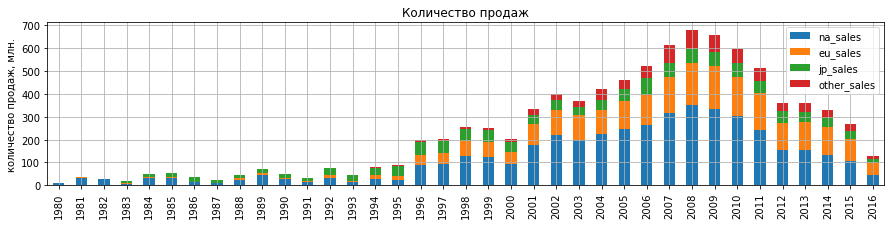

In [35]:
df.groupby('year')[sales_list].sum().plot.bar(
   grid=True, figsize=(15,3), stacked=True,
    title='Количество продаж', 
    xlabel='',     ylabel='количество продаж, млн.');

По этой столбчатой диаграмме нельзя с уверенностью сказать, что в 2012 году было продано меньше игр, чем в 2011 или в 2010. Можно только сказать, что самые популярные игры были выпущены в 2008 году. Всё же будем использовать подобные графики, учитывая, что большинство клиентов настроены покупать новые игры, когда они только появляются на рынке. 

Печально, но спад в индустрии игровых платформ и приставок закономерен. В 2016 году все уже активно пользовались смартфонами и приложениями для них, в том числе игровыми. Летом 2016 года бесплатная игра Pokemon Go совершила переворот, использовав абсолютно новый способ интерактивной реальности.

#### Количество игр в разные годы

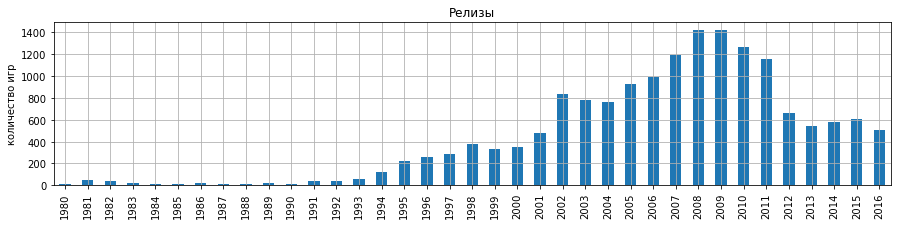

In [36]:
df.groupby('year')['year'].count().plot.bar(
        y='year', grid=True, figsize=(15,3),
        title='Релизы', 
        xlabel='',
        ylabel='количество игр');

С развитием компьютерной отрасли в целом, количество игр начало постепенно увеличиваться с 1994 года. Резкий скачок произошел в 2002 году. Возможно это связано с появлением нескольких игровых консолей или платформ. В 2008-2009 годах индустрия игр явно пережила максимум. После чего появление новых игр стало постепенно уменьшаться. Скорее всего основными покупателями к началу 2017 года являются те, у кого уже есть приобретённые ранее консоли и платформы.

#### Продолжительность жизни платформ

В ходе дальнейшего анализа будет построена таблица с продолжительностью жизни различных платформ. Благодаря этой таблице было обнаружено, что платформа **DS** впервые упоминалась в данных за **1985** год, хотя была создана в 2004. Так как неизвестна причина ошибки - указали не ту платформу или ошиблись с годом, удалим эту строку и продолжим.

In [37]:
'''
display(df = df.query('platform=="DS"').sort_values(by='year').head(5))
'''

# удалим строку
df = df[~((df['platform']=='DS')&(df['year']==1985))]

# создадим таблицу, где для каждой платформы определим год её появления в наших данных,
# последний год, когда для этой платформы создавались игры и получим возраст
df_platforms = df.groupby(['company', 'platform'])['year'].agg(['min', 'max']).reset_index()
df_platforms['life_time'] = df_platforms['max'] - df_platforms['min']

display(df_platforms.sort_values(by='life_time', ascending=False).head(10).style.hide(axis=0).\
        set_caption('Платформы с самой большой продолжительностью жизни').\
        set_table_styles([{'selector': 'caption', 'props': 'color: navy'}]))

print('Средний возраст платформ', df_platforms[df_platforms['platform']!='PC']['life_time'].median())

# рассчитаем возраст компаний
df_companies = df.groupby('company')['year'].agg(['min', 'max']).reset_index()
df_companies['life_time'] = df_companies['max'] - df_companies['min']

display(df_companies.sort_values(by='life_time', ascending=False).style.hide(axis=0).\
        set_caption('Продолжительность жизни компаний').\
        set_table_styles([{'selector': 'caption', 'props': 'color: navy'}]))

company,platform,min,max,life_time
PC,PC,1985,2016,31
Nintendo,GB,1988,2001,13
Nintendo,NES,1983,1994,11
Sony,PSP,2004,2015,11
Sony,PS3,2005,2016,11
Sony,PS2,2000,2011,11
Microsoft,X360,2005,2016,11
Nintendo,Wii,2006,2016,10
Nintendo,DC,1998,2008,10
Sony,PS,1994,2003,9


Средний возраст платформ 6.5


company,min,max,life_time
Nintendo,1983,2016,33
PC,1985,2016,31
Sony,1994,2016,22
Microsoft,2000,2016,16
Atari,1980,1989,9
Sega,1990,1999,9
Nokia,1993,1996,3
Panasonic,1994,1995,1
NEC,1995,1995,0


Получается, что на рынке игровых приставок всего три крупных игрока: Nintendo, Sony и Microsoft. Если не считать обычных компьютерных игр.

Учитывая средний возраст жизни платформ, начавшийся в 2010 году спад в создании новых игр и быструю изменчивость этого рынка в связи с появлением смартфонов,  достаточно изучать период с 2011 по 2016гг.

### <font color='navy'>Платформы и их производители</font>

#### Смена поколений

Посмотрим, как сменялись платформы и консоли основых компаний-производителей начиная с 2000 года, когда на рынок вышла последняя из этой четвёрки Мicrosoft. 

Графики выведем в одинаковом масштабе, чтобы можно было сравнить.

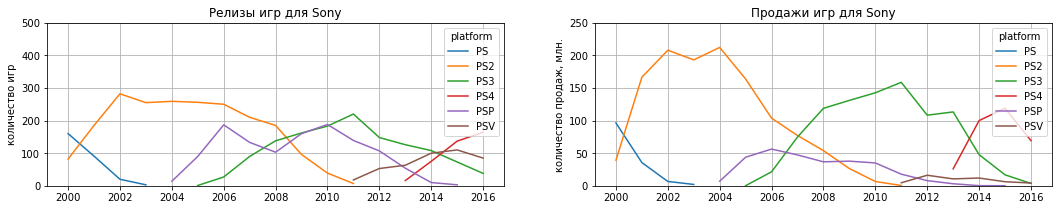

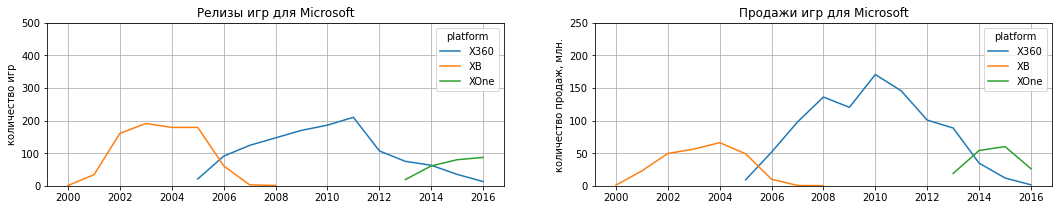

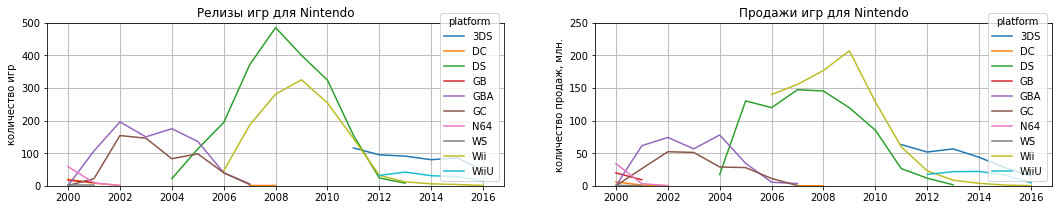

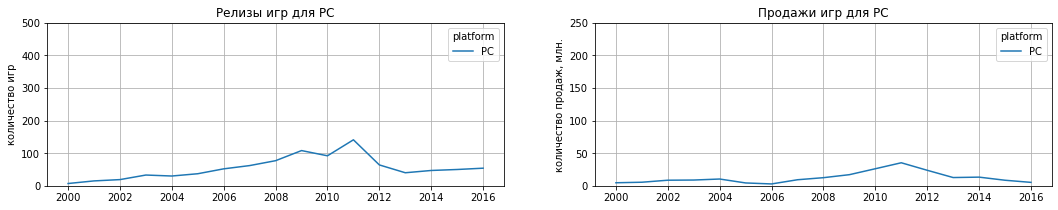

In [38]:
for comp_name in ['Sony', 'Microsoft', 'Nintendo', 'PC']:
    
    fig, ax = plt.subplots(ncols=2)
    
    df.query('company==@comp_name & year>1999').pivot_table(
        columns ='platform', index='year', values='global_sales', aggfunc='count').\
        plot(grid=True, figsize=(15,3), ylim=(0,500), ax=ax[0], 
             title='Релизы игр для '+ comp_name, 
             xlabel='', 
             ylabel='количество игр')

    df.query('company==@comp_name & year>1999').pivot_table(
        columns ='platform', index='year', values='global_sales', aggfunc='sum').\
        plot(grid=True, figsize=(18,3), ylim=(0,250), ax=ax[1], 
             title='Продажи игр для '+ comp_name, 
             xlabel='', 
             ylabel='количество продаж, млн.')
    
    plt.show()

Учтём, что у Microsoft существовала только одна линейка платформ, а Sony и особенно Nintendo выпускали как стационарные игровые приставки, так и портативные. У Компьютерных игр никаких платформ не было :)).

По графикам видно, что каждая компания выпускала новую консоль, которая постепенно набирала популярность, для неё активно создавались новые игры. А потом ситуация шла на спад, пока продажи игр и вовсе не прекращались. К кону жизни старой платформы, уже появлялась какая-то новая, более современная. Получается, что нам следует в качестве перспективных рассматривать только современные платформы, так как продажи игр для старых приставок будут только снижаться. 

Судя по графикам, выпуск новых игр, хотя и не сравним с пиковыми значениями 2008-2010гг, но всё же продолжается. 

#### Определение актуального периода
Посмотрим, для каких платформ игры продолжали создаваться в 2016 году.

In [39]:
display(df_platforms.sort_values(by=['max', 'life_time'], ascending=False).\
        head(10).style.hide(axis=0))

company,platform,min,max,life_time
PC,PC,1985,2016,31
Microsoft,X360,2005,2016,11
Sony,PS3,2005,2016,11
Nintendo,Wii,2006,2016,10
Nintendo,3DS,2011,2016,5
Sony,PSV,2011,2016,5
Nintendo,WiiU,2012,2016,4
Microsoft,XOne,2013,2016,3
Sony,PS4,2013,2016,3
Sony,PSP,2004,2015,11


Стоит учесть следующее:
- Поддержка игровой приставки `Wii` была прекращена в 2013 году,  ей на смену была выпущена `WiiU`;
- В апреле 2016 Microsoft остановило поддержку `X360`, её постепенно заменяет `XOne`;
- Аналогично происходит с дочками Sony, в 2016 году уже начинается отключение поддержки для `PS3`.

Таким образом, основное внимание стоит уделить более новым консолям. Оставим для изучения выжившие к 2016 году платформы 
- `PS4`, `PSV`, `XOne`, `3DS`, `WiiU`
- `PC` (компьютерные игры не будем сбрасывать со счетов, у них самый стабильный график).

In [40]:
# создадим список перспективных платформ
last_chance = ['PS4', 'WiiU', 'PSV', 'PC', '3DS', 'XOne']
last_chance.sort()

# найдём их возраст
display(df_platforms[df_platforms['platform'].isin(last_chance)]\
        [['platform', 'min', 'life_time']].\
        sort_values(by='min').reset_index(drop=True).\
        style.set_caption('Возраст выбранных платформ').\
        set_table_styles([{'selector': 'caption', 'props': 'color: navy'}])
       )

,platform,min,life_time
0,PC,1985,31
1,3DS,2011,5
2,PSV,2011,5
3,WiiU,2012,4
4,XOne,2013,3
5,PS4,2013,3


Таким образом, **актуальным** можно считать период **с 2013 по 2016гг**, когда уже существовали все выбранные нами платформы. Если выбрать период с 2011 года, то количество продаж для 3DS или PSV будет больше, чем, например, для PS4 или ХOne, которые появились на два года позже. 

#### Количество релизов и продаж по выбранным платформам

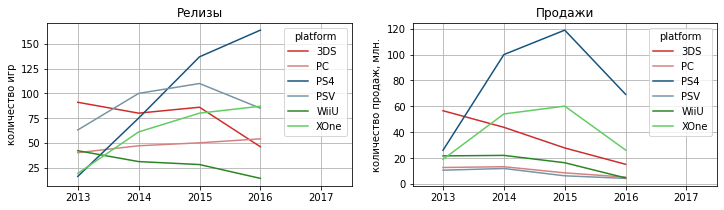

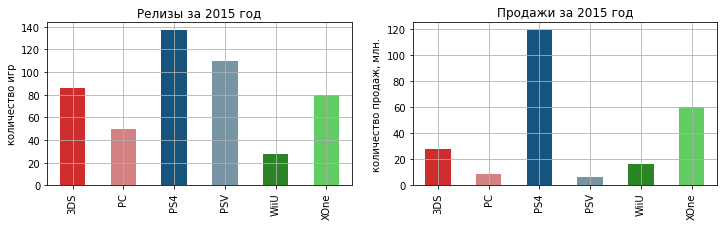

In [41]:
# создадим список и словарь с цветами для платформ
platform_colors = ['#cf2c2c', '#d48281','#16537d','#7794a3','#2b8524','#61cc64']
colors_dict = dict(zip(last_chance, platform_colors))

fig, ax = plt.subplots(ncols=2)

df[(df['platform'].isin(last_chance)) & (df['year']>2012)].\
    pivot_table(
        columns ='platform', index='year', values='global_sales', aggfunc='count').plot(
        grid=True, figsize=(12,5), xlim=(2012.5,2017.5), ax=ax[0], 
        color = colors_dict,
        title='Релизы',
        xlabel='', ylabel='количество игр')

df[(df['platform'].isin(last_chance)) & (df['year']>2012)].\
    pivot_table(
        columns ='platform', index='year', values='global_sales', aggfunc='sum').plot(
        grid=True, figsize=(12,3), xlim=(2012.5,2017.5), ax=ax[1], 
        color = colors_dict,
        title='Продажи', 
        xlabel='', ylabel='количество продаж, млн.')

plt.show()

fig, ax = plt.subplots(ncols=2)

df[(df['platform'].isin(last_chance))\
    &(df['year']==2015)].groupby('platform')['global_sales'].count().plot.bar(
        grid=True,  figsize=(12,5), ax=ax[0],
        color = platform_colors,
        title='Релизы за 2015 год', 
        xlabel='', ylabel='количество игр');

df[(df['platform'].isin(last_chance))\
    & (df['year']==2015)].groupby('platform')['global_sales'].sum().plot.bar(
        grid=True, figsize=(12,3), ax=ax[1],
        color = platform_colors,
        title='Продажи за 2015 год', 
        xlabel='', ylabel='количество продаж, млн.');

plt.show()

В описании данных было указано, что информация за 2016 год может быть неполной. Поэтому в качестве примера используется 2015 год. 

Рассмотрим эти графики. 
- Для <font color='#16537d'>**PS4**</font> всё логично - для неё выпускается больше всего игр. И количество продаж значительно превышает продажи остальных платформ. Это явный лидер. 


- Количество релизов и продаж игр для <font color='#cf2c2c'>**3DS**</font> в последние годы постепенно сокращается. 


- Платформа <font color='#5bbf5e'>**XOne**</font> была создана в то же время, что и PS4, но отстаёт и по количеству выпущенных игр, и по количеству продаж почти в 2 раза. Т.е. она менее популярна, но её показатели всё же медленно увеличиваются. 


- <font color='#2b8524'>**WiiU**</font> - не надёжная платформа. Релизов всё меньше и меньше. Количество продаж также сокращается. Похоже, Nintendo делает ставку на 3DS, а WiiU не смогла повторить рекорды своей предшественницы Wii. 


- <font color='#7794a3'>**PSV**</font> выпускает больше игр, чем, остальные платформы. Но эти игры продаются гораздо реже, т.е. эта портативная консоль не пользуется популярностью. Похоже, дела PSV обстоят хуже, чем у остальных. Так и разориться не долго, если ты не Sony.


- Ну и, наконец, обычные компьютерные игры для <font color='#d48281'>**PC**</font>. Релизы с небольшим ростом, но выходят постоянно. Количество продаж невелико, но всё же больше, чем у той же PSV. 

#### Исторические данные

Найдём платформы и компании с наибольшим числом продаж за всё время наблюдений. 

In [42]:
display(df.groupby(['company', 'platform'])['global_sales'].agg(['count', 'sum']).\
            sort_values(by='sum', ascending=False).reset_index().head(10).\
            style.format('{:.2f}', subset=['count', 'sum']).\
            background_gradient('Blues', subset=['count', 'sum']))


display(df.groupby(['company'])['global_sales'].agg(['count', 'sum']).\
            sort_values(by='sum', ascending=False).reset_index().head(5).\
            style.format('{:.2f}', subset=['count', 'sum']).\
            background_gradient('Blues', subset=['count', 'sum']))

,company,platform,count,sum
0,Sony,PS2,2106.00,1250.44
1,Microsoft,X360,1242.00,968.72
2,Sony,PS3,1314.00,937.05
3,Nintendo,Wii,1292.00,904.14
4,Nintendo,DS,2096.00,804.24
5,Sony,PS,1189.00,727.58
6,Sony,PS4,392.00,314.14
7,Nintendo,GBA,811.00,313.73
8,Sony,PSP,1188.00,293.33
9,PC,PC,968.00,258.95


,company,count,sum
0,Sony,6619.00,3576.38
1,Nintendo,6211.00,3501.51
2,Microsoft,2299.00,1383.67
3,PC,968.00,258.95
4,Atari,116.00,86.48


Лидером стала приставка **Play Station 2**. 1.25 миллиарда проданных игр!!! В десятке самых популярных платформ половину мест заняли платформы Sony. Удивила Atari, которая смогла обогнать всех, кроме самых современных компаний.

Из выбранных нами платформ в десятку лидеров вошла PS4.

#### Распределение значений количества продаж

,PS4,3DS,PC,XOne,WiiU,PSV,all_platforms
count,392.00,303.00,191.00,247.00,115.00,358.00,2235.00
mean,0.80,0.47,0.21,0.65,0.56,0.09,0.49
std,1.61,1.38,0.35,1.04,1.04,0.15,1.23
min,0.01,0.01,0.01,0.01,0.01,0.01,0.01
25%,0.06,0.04,0.03,0.06,0.06,0.02,0.03
50%,0.20,0.09,0.08,0.22,0.20,0.04,0.11
75%,0.73,0.28,0.22,0.69,0.60,0.11,0.40
max,14.63,14.60,3.05,7.39,7.09,1.96,21.05


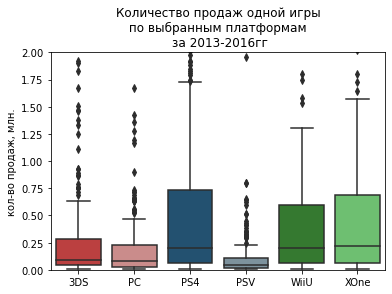

In [43]:
# создадим таблицу характерных значений добавим значение для всех платформ
df_describe = df.query('year>2012')['global_sales'].describe().to_frame()

# и значения для каждой платформы по отдельности
for platf in last_chance:
    df_describe[platf] = df.query('year>2012 & platform==@platf')['global_sales'].describe()

df_describe = df_describe.rename(columns={'global_sales': 'all_platforms'})
df_describe = df_describe[['PS4', '3DS', 'PC', 'XOne', 'WiiU', 'PSV', 'all_platforms']]    

display(df_describe.style.set_caption('Характерные значения продаж для выбранных платформ').\
        format('{:.2f}').\
        set_table_styles([{'selector': 'caption', 'props': 'color: navy'}]).\
        set_table_styles({x: [{'selector': 'th', 
                               'props': [('color', colors_dict[x])]}] for x in colors_dict}, 
                         overwrite=False))

# построим диаграмму размаха для ТОП-6 платформ
sns.boxplot(x='platform', y='global_sales', 
            data = df[(df['platform'].isin(last_chance))&(df['year']>2012)].\
                   sort_values(by='platform'), 
            palette = platform_colors)
plt.ylim(0, 2)
plt.ylabel('кол-во продаж, млн.')
plt.xlabel('')
plt.title('Количество продаж одной игры\n по выбранным платформам \n за 2013-2016гг')
plt.show()

- Половина всех созданных в 2013-2016 гг игр была продана в количестве от 30 до 400 тысяч экземпляров (с медианой 110 тысяч).
- Как уже было замечено, хуже всего обстоят дела у PSV, которая имеет самые низкие характерные значения продаж, несмотря на большое количество релизов.
- Надёжнее всех выглядят PS4 и XOne. У этих двух платформ наиболее популярные игры, которые по количеству продаж на диаграмме размаха попадают в число выбросов. 
- PS4, XOne и WiiU - стационарные консоли. Среднее количество продаж для каждой игры у этих платформ больше, чем количество продаж для портативных платформ PSV и 3DS и для компьютерных игр. Т.е. игры для портативных устройств покупают реже. Скорее всего, виноваты набирающие популярность смартфоны.

#### Гистограммы глобальных продаж по платформам

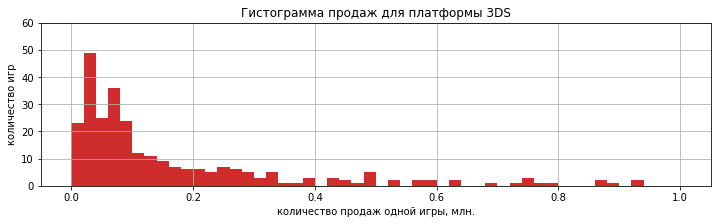

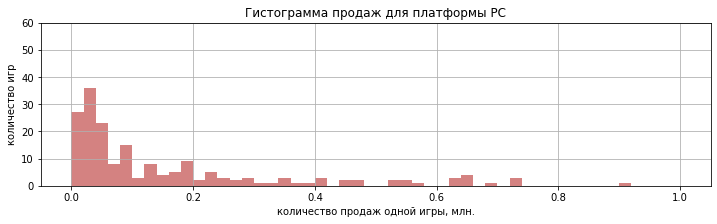

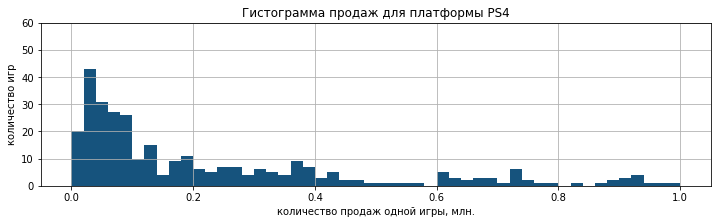

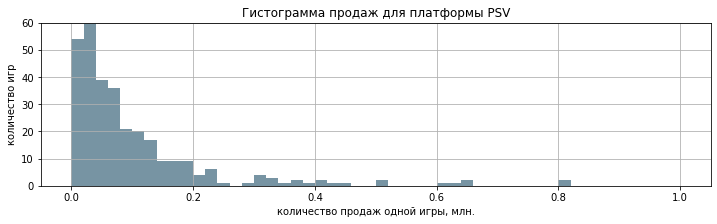

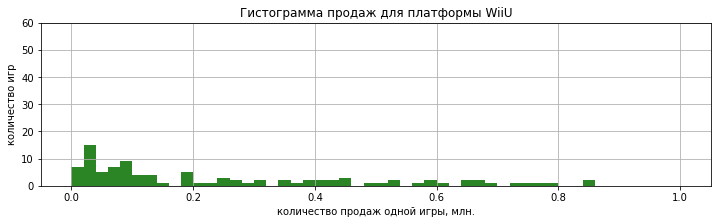

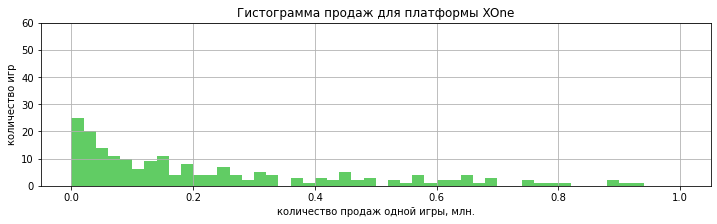

In [44]:
for i in range(0, len(last_chance)):
    df.query('year>2012 & platform==@last_chance[@i]')['global_sales'].\
        plot.hist(range=(0,1), grid=True, bins=50, figsize=(12,3), 
        title='Гистограмма продаж для платформы '+last_chance[i], 
        color=platform_colors[i])
    plt.xlabel('количество продаж одной игры, млн.')
    plt.ylabel('количество игр')
    plt.ylim(0,60)
    plt.show()

#### Выбор наиболее перспективных платформ

Создадим таблицу `df_platf` c суммами продаж по всем платформам в разных регионах.

In [45]:
# добавим глобальные продажи в список sales_list
sales_list.append('global_sales')

In [46]:
# создадим сводную таблицу, сгуппировав по платформам и посчитаем сумму продаж по регионам
df_platf = df.query('year>2012').pivot_table(
        index='platform', values=sales_list, aggfunc='sum').\
        sort_values(by='global_sales', ascending=False).\
        reset_index(drop=False)

# расставим столбцы в привычном порядке
df_platf = df_platf [['platform']+sales_list]

display(df_platf.\
            style.format('{:.2f}', subset=sales_list).\
            background_gradient('Blues', subset=sales_list))

,platform,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,PS4,108.74,141.09,15.96,48.35,314.14
1,PS3,63.50,67.81,23.35,26.77,181.43
2,XOne,93.12,51.59,0.34,14.27,159.32
3,3DS,38.20,30.96,67.81,6.28,143.25
4,X360,81.66,42.52,0.51,12.11,136.80
5,WiiU,29.21,19.85,10.88,4.69,64.63
6,PC,11.13,25.59,0.00,2.99,39.71
7,PSV,5.04,6.10,18.59,3.26,32.99
8,Wii,6.56,5.93,0.05,1.12,13.66
9,PSP,0.00,0.17,3.29,0.04,3.50


Больше всего игр в мире продавалось для платформы PS4. Cамыми перспективными действительно можно считать PS4 и XOne. Таблицу `df_platf` сможем использовать для дальнейшего изучения данных по региональным пользователям. 

### <font color='navy'>Жанры</font>

#### Количество продаж игр разных жанров за весь период наблюдений

In [47]:
# создадим сводную таблицу, сгруппировав по жанрам
df_genre = df.pivot_table(index='genre', values=sales_list, aggfunc='sum').\
    sort_values(by='global_sales', ascending=False).reset_index()

# расставим столбцы в привычном порядке
df_genre = df_genre[['genre']+sales_list]

display(df_genre.style.format('{:.2f}', subset=sales_list).\
        set_caption('Продажи игр по жанрам (млн.) за всё время наблюдений').\
        set_table_styles([{'selector': 'caption', 'props': 'color: navy'}]).\
        background_gradient('Blues', subset=sales_list))

,genre,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Action,872.76,517.18,160.13,184.12,1734.19
1,Sports,681.75,375.80,135.27,134.21,1327.03
2,Shooter,587.42,316.51,38.69,103.91,1046.53
3,Role-Playing,330.04,188.24,353.39,59.41,931.08
4,Platform,444.44,199.87,130.71,51.01,826.03
5,Misc,406.21,212.52,107.02,74.29,800.04
6,Racing,358.13,236.04,56.69,75.97,726.83
7,Fighting,222.68,100.18,87.28,36.33,446.47
8,Simulation,180.40,113.35,63.64,30.57,387.96
9,Puzzle,121.68,49.80,56.68,12.35,240.51


Везде кроме Японии больше всего продаётся игр жанра Экшн, спортивные игры и стрелялки. Меньше всего продаются стратегии, квесты (adventure) и пазлы. 

В Японии ролевые игры покупают в таком количестве, что сместили глобальные продажи этих игр на четвёртое место. (Иначе они бы занимали приблизительно седьмую строку). А вот стрелять в стране восходящего солнца не любят.

#### Популярность жанров в актуальный период

- Если для какого-то жанра создаётся много разных игр, каждая из которых продаётся в небольшом количестве, то и количество продаж для всей группы будет большим. Но это не значит, что все такая группа игр пользуется популярностью. 
- Популярной можно считать ту игру, количество продаж которой больше. Для группы игр это будет значить, что популярнее та группа игр, медиана  количества продаж которой больше. 

Создадим таблицу, куда сохраним медианы для каждого жанра и каждого региона. Так мы сможем определить, где в какие игры больше любят играть. 

In [48]:
# создадим сводную таблицу, сгруппировав по жанрам
df_genre = df.query('year>2012 & platform.isin(@last_chance)').\
            pivot_table(index='genre', values=sales_list, aggfunc='median')

# отсортируем по медианам глобальных продаж
df_genre = df_genre.sort_values(by='global_sales', ascending=False).reset_index()

# расставим столбцы в привычном порядке
df_genre = df_genre[['genre']+sales_list]

display(df_genre.style.format('{:.2f}', subset=sales_list).\
        set_caption('Медианы продаж для разных жанров за 2013-2016гг (млн.)').\
        set_table_styles([{'selector': 'caption', 'props': 'color: navy'}]).\
        background_gradient('Blues', subset=sales_list))

,genre,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Shooter,0.21,0.23,0.00,0.04,0.52
1,Platform,0.09,0.08,0.00,0.03,0.24
2,Sports,0.06,0.06,0.00,0.02,0.23
3,Role-Playing,0.01,0.01,0.05,0.01,0.12
4,Fighting,0.04,0.03,0.03,0.01,0.12
5,Misc,0.01,0.00,0.03,0.00,0.10
6,Racing,0.03,0.07,0.00,0.01,0.10
7,Action,0.01,0.02,0.01,0.01,0.09
8,Simulation,0.00,0.03,0.00,0.00,0.09
9,Strategy,0.00,0.03,0.00,0.00,0.08


Самые популярные игры те, где нужно в кого-то стрелять 😮. Затем идут игры, созданные для конкретной платформы и на третьем месте спортивные игры. Меньше всего клиенты любят стратегии, приключения и пазлы. В Японии ситуация отличается.

### <font color='navy'>Серии игр</font>

#### Изучим серии за весь период наблюдений

In [49]:
display(df.query('series!=""')['series'].value_counts().to_frame().head(10).\
       style.set_caption('Игры с самым большим количеством серий:').\
        set_table_styles([{'selector': 'caption', 'props': 'color: navy'}]))

display(df.query('series!=""').groupby('series')['global_sales'].\
    agg(['count', 'median', 'sum']).\
    sort_values(by='sum', ascending=False).reset_index().head(10).\
    style.format('{:.2f}', subset = ['count', 'median', 'sum']).\
    set_caption('Серии игр с наибольшим числом продаж за всё время наблюдений').\
        set_table_styles([{'selector': 'caption', 'props': 'color: navy'}]).\
        background_gradient('Blues', subset=['sum', 'median']))

,series
NBA,240
LEGO,165
FIFA,141
NHL,109
Mario,105
Madden NFL,95
Star Wars,91
Final Fantasy,90
Sonic,84
Tom Clancy's,84


,series,count,median,sum
0,Mario,105.00,2.25,526.21
1,Call of Duty,65.00,1.71,257.65
2,Pokemon,36.00,1.81,209.35
3,FIFA,141.00,0.53,176.10
4,Grand Theft Auto,28.00,2.41,162.01
5,NBA,240.00,0.32,139.56
6,LEGO,165.00,0.62,139.15
7,Madden NFL,95.00,0.84,124.12
8,Sonic,84.00,1.02,115.14
9,Final Fantasy,90.00,0.59,111.98


Удивительные цифры. **526** миллионов проданных игр с Марио. Это мы могли ещё не всех Марио посчитать из базы данных, потому что там и Луиджи, и Йоши встречались тоже. 

Историческая информация также может пригодится. Возможно в нашем магазине компьютерных игр продаются не только современные игры. 

In [50]:
print('Медианы продаж (млн.) за весь период:')
print('- для игр из серий   \033[1m', 
      round(df.query('series!=""')['global_sales'].median(), 2), '\033[0m')
print('- для игр не из серий\033[1m', 
      round(df.query('series==""')['global_sales'].median(), 2), '\033[0m')

Медианы продаж (млн.) за весь период:
- для игр из серий    0.29 
- для игр не из серий 0.13 


#### Популярные серии актуального периода

In [51]:
print('Медианы продаж (млн.) за 2013-2016гг:')
print('- для игр, из серий\033[1m', 
      round(df.query('year>2012 & series!=""')['global_sales'].median(), 2), '\033[0m')
print('- для игр не из серий\033[1m', 
      round(df.query('year>2012 & series==""')['global_sales'].median(), 2), '\033[0m')

display(df.query('series!="" & year>2012 & platform.isin(@last_chance)').\
        groupby('series')['global_sales'].agg(['count', 'sum']).\
        sort_values(by='sum', ascending=False).reset_index().head(10).\
        style.format('{:.2f}', subset = ['count', 'sum']).\
        set_caption('Серии игр с наибольшим числом продаж за 2013-2016 гг ').\
        set_table_styles([{'selector': 'caption', 'props': 'color: navy'}]).\
        background_gradient('Blues', subset='sum'))

Медианы продаж (млн.) за 2013-2016гг:
- для игр, из серий 0.21 
- для игр не из серий 0.07 


,series,count,sum
0,Call of Duty,13.00,50.42
1,FIFA,16.00,37.22
2,Pokemon,6.00,35.25
3,LEGO,52.00,23.28
4,Mario,16.00,23.20
5,Assassin's Creed,17.00,19.51
6,Grand Theft Auto,3.00,19.26
7,NBA,17.00,17.17
8,Madden NFL,8.00,14.09
9,Star Wars,8.00,13.09


И опять удивительные цифры! За 4 года 3 серии игры GTA приобрели более 50 миллионов раз. Выход новых  серий таких популярных игр ни в коем случае нельзя упускать из внимания. Марио, кстати, теряет популярность.

Осталось взглянуть во что играют в разных частях света. Поступим также, как и в случае с жанрами - создадим таблицу с медианами продаж. 

In [52]:
# создадим сводную таблицу
df_series = df.query('year>2012 & series!=""').pivot_table(
        index='series', values=sales_list, aggfunc='median').\
        sort_values(by='global_sales', ascending=False).\
        reset_index(drop=False)

# расставим столбцы в привычном порядке
df_series = df_series [['series']+sales_list]

display(df_series.head(10).style.format('{:.2f}', subset=sales_list).\
            background_gradient('Blues', subset=sales_list))

,series,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Grand Theft Auto,3.96,5.14,0.06,1.41,12.62
1,Uncharted,2.07,1.71,0.08,0.76,4.62
2,Pokemon,1.73,0.90,1.30,0.27,4.20
3,Monster Hunter,0.00,0.00,2.62,0.00,3.32
4,Halo,1.91,1.00,0.03,0.29,3.23
5,Call of Duty,1.56,0.87,0.01,0.27,2.92
6,Fallout,1.51,1.00,0.01,0.24,2.75
7,Zelda,0.92,0.55,0.17,0.14,1.80
8,Killzone,0.55,0.86,0.06,0.28,1.75
9,Animal Crossing,0.35,0.57,0.74,0.07,1.73


Значит, самые популярные игры в мире к началу 2016 года - это GTA и Uncharted. Подбробнее изучим таблицу `df_series`, когда будем рисовать портрет пользователей разных регионов.

### <font color='navy'>Отзывы критиков и пользователей</font>

Построим матрицу корелляции, чтобы определить зависимость количества продаж от отзывов. 
Выборку сделаем только для актуального периода с 2013 года. Рассмотрим сначала данные по всем платформам, затем по каждой из выбранных. 

Для построения матриц корелляции будем использовать только те строки, где указаны обе оценки - критиков и пользователей, так как изначально нулевых оценок не было и некорректно сравнивать имеющуюся оценку с отсутствующей.

In [53]:
# Матрица для всех платформ по срезу
display(df.query('year>2012 & (critic_score*user_score)>0')[['critic_score', 'user_score'] + sales_list].\
        corr().head(2).style.format('{:.2f}').\
        set_caption('Значения корелляции за период 2013-2016 гг для всех платформ').\
        set_table_styles([{'selector': 'caption', 'props': 'color: navy'}]))

# для каждой платформы из списка
for platf in last_chance:
    display(df.query('year>2012 & (critic_score*user_score)>0 & platform==@platf')\
            [['critic_score', 'user_score'] + sales_list].\
            corr().head(2).style.format('{:.2f}').\
            set_caption('Значения корелляции за период 2013-2016 гг для ' + platf).\
            set_table_styles([{'selector': 'caption', 'props': 'color: navy'}]))

,critic_score,user_score,na_sales,eu_sales,jp_sales,other_sales,global_sales
critic_score,1.00,0.50,0.30,0.28,0.13,0.27,0.31
user_score,0.50,1.00,-0.02,-0.03,0.19,-0.01,-0.00


,critic_score,user_score,na_sales,eu_sales,jp_sales,other_sales,global_sales
critic_score,1.00,0.77,0.35,0.25,0.28,0.34,0.34
user_score,0.77,1.00,0.28,0.18,0.25,0.26,0.27


,critic_score,user_score,na_sales,eu_sales,jp_sales,other_sales,global_sales
critic_score,1.00,0.43,0.19,0.19,nan,0.18,0.20
user_score,0.43,1.00,-0.07,-0.12,nan,-0.13,-0.11


,critic_score,user_score,na_sales,eu_sales,jp_sales,other_sales,global_sales
critic_score,1.00,0.56,0.41,0.35,0.32,0.41,0.41
user_score,0.56,1.00,-0.02,-0.05,0.17,-0.04,-0.03


,critic_score,user_score,na_sales,eu_sales,jp_sales,other_sales,global_sales
critic_score,1.00,0.61,0.10,0.28,0.17,0.20,0.25
user_score,0.61,1.00,0.16,0.27,0.13,0.23,0.27


,critic_score,user_score,na_sales,eu_sales,jp_sales,other_sales,global_sales
critic_score,1.00,0.72,0.39,0.40,0.27,0.40,0.38
user_score,0.72,1.00,0.40,0.43,0.34,0.41,0.41


,critic_score,user_score,na_sales,eu_sales,jp_sales,other_sales,global_sales
critic_score,1.00,0.47,0.38,0.37,0.20,0.40,0.41
user_score,0.47,1.00,-0.09,-0.08,0.07,-0.10,-0.09


Бросается в глаза, что оценки пользователей и критиков между собой не имеют сильной линейной связи. Т.е. эти две оценки далеко не всегда совпадают. Сильной зависимости между оценками и продажами также нигде не прослеживается.

Рассмотрим различия для разных платформ. Можно отметить следующее:

- Для консолей, которые явно теряют популярность PSV и WiiU отзывы пользователей как правило чуть больше влияют на продажи, хотя влияние это незначительно. 
- В случае наиболее активных PS4 и XOne всё наоборот - оценки пользователей не имеют никакого влияния на продажи. А вот критики всё же влияют, хотя и не сильно.
- Продажи компьютерных игр не зависят ни от каких оценок. В Японии эти оценки и вовсе не собираются.

Чтобы убедиться в наших выводах построим диаграмму рассеяния для оценок игр платформы PS4:

In [54]:
platform_colors

['#cf2c2c', '#d48281', '#16537d', '#7794a3', '#2b8524', '#61cc64']

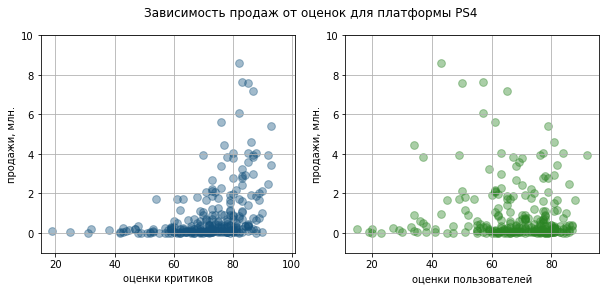

In [55]:
fig, ax = plt.subplots(ncols=2)

df.query('year>2012 & platform=="PS4" & critic_score>0').\
        plot.scatter(x='critic_score', y='global_sales', 
            grid=True, figsize=(10,4), ylim=(-1,10), 
            color=colors_dict['PS4'], s=60, alpha=0.4, ax=ax[0],
            xlabel='оценки критиков', ylabel='продажи, млн.')

df.query('year>2012 & platform=="PS4" & user_score>0').\
        plot.scatter(x='user_score', y='global_sales', 
            grid=True, ylim=(-1,10), 
            color=platform_colors[4], s=60, alpha=0.4, ax=ax[1],
            xlabel='оценки пользователей', ylabel='продажи, млн.')

plt.suptitle('Зависимость продаж от оценок для платформы PS4')
plt.show()

### <font color='navy'>Рейтинг</font>

Посмотрим какие значения рейтинга имеются в нашем срезе данных по выбранным платформам

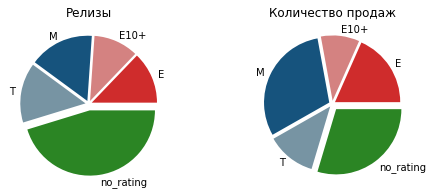

,rating,count,mean,std,min,25%,50%,75%,max
0,E,206.0,0.67,1.27,0.01,0.04,0.14,0.71,8.58
1,E10+,178.0,0.40,0.57,0.01,0.08,0.25,0.53,4.44
2,M,257.0,0.89,1.46,0.01,0.08,0.25,1.17,12.62
3,T,238.0,0.39,0.81,0.01,0.06,0.13,0.32,5.64
4,no_rating,727.0,0.31,1.15,0.01,0.02,0.06,0.15,14.63


Характерные значения продаж, млн.


In [56]:
# сохраним список отступов для деления "пирога"
rating_explode = [0.05,0.05,0.05,0.05,0.1]

fig, ax = plt.subplots(ncols=2)

df.query('year>2012 & platform.isin(@last_chance)').groupby('rating')['global_sales'].\
    count().plot.pie(ax=ax[0], figsize=(8,3), explode=rating_explode,
            ylabel='', title='Релизы', colors=platform_colors)

df.query('year>2012 & platform.isin(@last_chance)').groupby('rating')['global_sales'].\
    sum().plot.pie(ax=ax[1], figsize=(8,3), explode = rating_explode,
            ylabel='', title='Количество продаж', colors=platform_colors)

plt.show()

display(round(df.query('year>2012 & platform.isin(@last_chance)').\
        groupby('rating')['global_sales'].describe().reset_index(), 2))
print('Характерные значения продаж, млн.')

- Лучше всего продаются игры для взрослых. 
- Игры, которые мало популярны рейтинг, судя по всему, вообще не получают. 
- Выгоднее всего вкладываться в игры с рейтингом  `M` (для взрослых) или  `E` (для всех).

Что касается регионов:

In [57]:
# создадим сводную таблицу
df_rating = df.query('year>2012 ').pivot_table(
        index='rating', values=sales_list, aggfunc='sum').\
        sort_values(by='global_sales', ascending=False).\
        reset_index(drop=False)

# расставим столбцы в привычном порядке
df_rating = df_rating [['rating']+sales_list].head(10)

display(df_rating.\
            style.format('{:.2f}', subset=sales_list).\
            background_gradient('Blues', subset=sales_list))

,rating,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,M,165.23,145.55,14.11,47.07,371.96
1,no_rating,89.42,78.91,85.05,23.46,276.84
2,E,79.05,83.36,15.14,22.61,200.16
3,T,49.79,41.95,20.59,14.29,126.62
4,E10+,54.24,42.69,5.89,12.57,115.39


Табличка `df_rating` показывает, что в Японии всё опять кверх-ногами. 

### <font color='navy'>Выводы по исследованию данных</font>

В ходе анализа данных мы узнали следующее:

- Исторически (т.е. за весь период) средний возраст платформ составляет около **6.5** лет. 

- После 2000 года на игровом рынке остались только компьютерные игры (**PC**) и игры для платформ трёх производителей **Nintendo**, **Sony** и **Microsoft**. Причём платформы каждой фирмы постепенно сменяли друг друга. Продажи старых консолей уменьшались, а в это время появлялись новые, которые постепенно набирали популярность. 
    - У Microsoft было только три стационарные приставки. 
    - Sony выпустила линейку стационарных приставок и две портативные консоли. Эти две линии существовали параллельно.
    - Nintendo обладала самым широким разнообразием различных платформ. Её портативный Game Boy прожил дольше всех - 13 лет.

- Пик популярности компьютерных игр пришелся на **2008-2010** гг. После чего количество релизов и продаж стало постепенно сокращаться. Количество продаж всех игр в 2015 году почти в 2 раза меньше, чем в 2008. (С 2016 не сравниваем, так как данные за 2016 год могут быть неполными, но спад продаж, похоже продолжается). 

- Новые релизы в 2016 году появились только для 5 платформ **PS4** и **PSV** (Sony), **XOne** (Microsoft), **3DS** и **WiiU** (Nintendo), не считая компьютерных игр **PC**. Поэтому для изучения были оставлены все 6, несмотря на крайне низкие показатели продаж для PSV.

- Самые новые платформы из указанного списка PS4 и XOne появлись только в 2013 году. Поэтому изучаемый период был сокращён до **2013-2016** гг.

1. Самая популярная и активная платформа на конец 2016 года **PS4**. Количество релизов и продаж сильно превышает показатели всех остальных консолей. А по количеству продаж за всё время наблюдений эта консоль вышла на шестое место.

2. Вторая по количеству продаж **ХOne** отстаёт от PS4 в два раза, но пока её поплуярность постепенно растёт. 

3. Количество релизов **3DS** в последние годы сокращается, но не настолько быстро, как у WiiU или PSV.

4. **WiiU** похоже постепенно уходит с рынка. Количество продаж и релизов сильно сокращается. 

5. Учитывая средний возраст платформ, можно сказать, что **PSV** уже состарилась. Считать её перспективной точно не стоит.

6. Компьютерные игры **PC** существуют уже 31 год (если считать до 2016) и похоже никуда уходить не собираются. Количество релизов и продаж для них невелико, но зато почти постоянно, не считая скачка во время всеобщей популярности 2008-2010гг.

- Медиана количества продаж для одной игры за актуальный период по выбранным платформам составляет **110 тысяч** экземпляров. Т.е. в среднем одну игру покупают 110 тысяч раз, а половину всех игр - от 30 до 400 тысяч раз.

- Самые популярные **жанры** по всему миру это Action, Shooter и Role-Playing, меньше всего покупают игры жанров Puzzle, Adventure и Strategy.

- Наиболее продаваемые **серии игр** за последнее время - Call of Duty, Grand Theft Auto, Pokemon и	из спортивных игр - FIFA. 

- **Оценки** критиков и пользователей 
    - не всегда совпадают; 
    - для игр на стареющих платформах (PSV и WiiU) отзывы пользователей влияют на продажи чуть сильнее чем отзывы критиков;
    - продажи игр популярных платформ (PS4 и XOne) не зависят от оценок пользователей, но совсем незначительно зависят от оценок критиков;
    - продажи компьютерных игр не зависят ни от каких оценок. 

- Лучше всего продаются игры с рейтингом **M** для взрослых и в меньшей степени **E** (для всех).

## Портреты пользователей


### Создание набросков

Так как нас интересуют актуальные данные, построим портреты пользователей по данным за 2013-2016гг. Для диаграмм будем рассчитывать сумму продаж, как определяющий популярность фактор. Используем имеющиеся таблицы `df_platf`, `df_genre`, `df_series`, `df_rating`. И создадим функцию, чтобы нарисовать портрет для каждого. 

In [58]:
'''
# посмотреть на таблицы можно здесь
display(df_platf)
display(df_genre)
display(df_series)
display(df_rating)
'''

# добавим цвета в словарь для платформ
colors_dict['X360'] = '#d2db69'
colors_dict['PS3'] = '#d48281'
colors_dict['other'] = '#bd7b00'


# создадим функцию, чтобы нарисовать портрет
def portrait(region):
    '''
    функция portrait принимает в качестве параметра 
    region - название столбца с количеством проданных экземпляров в регионе
    '''
    
    fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,8))
    
    # 1) для первой диаграммы-пирога создадим сводную таблицу с платформами
    df_0 = df_platf[['platform', region]].\
                sort_values(by=region, ascending=False).reset_index(drop=True)
    
    # оставим 5 самых популярных платформ в регионе, остальные заменим на other
    df_0['platform'] = df_0['platform'].mask(df_0.index>4, 'other')
        # заменим суммы продаж для other общей суммой
    df_0[region] = df_0[region].mask(df_0['platform']=='other', 
                            df_0[df_0['platform']=='other'][region].sum())
    # оставим 6 строк (5 популярных платформ и other)
    df_0 = df_0.head(6)
    
    # создадим для этой таблицы список цветов по платформам
    portrait_colors = list(colors_dict.get(x, 'gray') for x in df_0['platform'])
    
    # сделаем столбец 'platform' индексом
    df_0 = df_0.set_index('platform')
    
    # нарисуем "пирог" с платформами
    df_0.plot.pie(x='platform', y=region, ax=ax[0,0], autopct='%1.1f%%', legend=False, 
                  colors=portrait_colors, 
                  explode=[0.05,0.05,0.05,0.05,0.05,0.2], 
                  ylabel='', title='Продажи игр разных платформ')
    
    # 2) для столбчатой диаграммы выберем 5 популярных жанров
    # пришлось их опять сгруппировать, иначе они не хотели закрашиваться в разные цвета
    df_genre[['genre', region]].sort_values(by=region, ascending=False).\
                reset_index(drop=True).head(5).\
                groupby('genre')[region].sum().sort_values().\
                plot.barh(legend=False, ax=ax[0, 1], grid=True, 
                   xlabel='', 
                   title='Популярные жанры (медиана продаж, млн.)', 
                   color=list(reversed(platform_colors)))
    
    # 3) рейтинг тоже выведем как пирог
    df_rating.groupby('rating')[region].sum().\
            plot.pie(ax=ax[1,1], explode = rating_explode, autopct='%1.1f%%', 
            ylabel='', title='Продажи игр. Рейтинг ESRB', colors=platform_colors)
    
    # 4) и столбчатая диаграмма с любимыми серийными играми, тоже пришлось группровать
    df_series[['series', region]].sort_values(by=region, ascending=False).\
                reset_index(drop=True).head(5).\
                groupby('series')[region].sum().sort_values().\
                plot.barh(legend=False, ax=ax[1, 0], grid=True,
                   xlabel='', 
                   title='Популярные серии игр (медиана продаж, млн.)', 
                   color=list(reversed(platform_colors)))
    
    plt.subplots_adjust(wspace=0.5, hspace=0.3)
    plt.show()
    print()

### <font color='navy'>Портрет клиента из Америки</font>

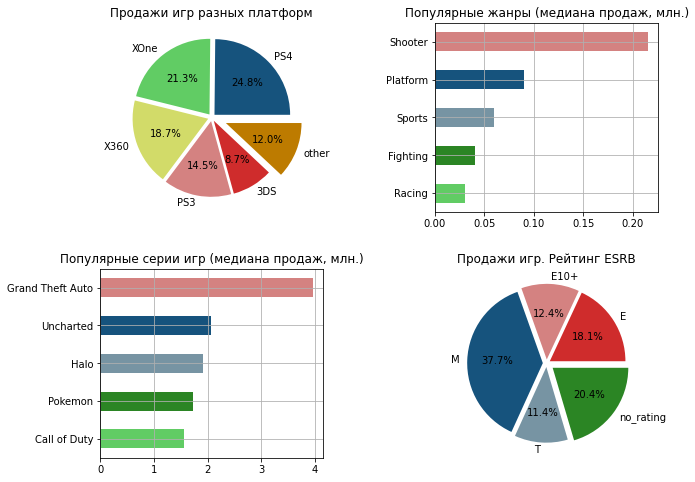

In [59]:
portrait('na_sales')

Среднестатистический американский клиент магазина компьютерных игр имеет современную приставку PS4 компании Sony или, если он партриотически настроен, то у него XOne от Microsotf. Он любит стрелять и иногда сражаться в GTA, но можно и побродить в жанре Platform в Uncharted. Спортивные игры и гонки здесь тоже любят. Почти 40% всех игр, которые покупают в Америке - игры для взрослых (рейтинг М), детей балуют в 30% случаев (Е и Е10+). Дети предпочитают Покемонов (дань времени).

### <font color='navy'>Портрет клиента из Европы</font>

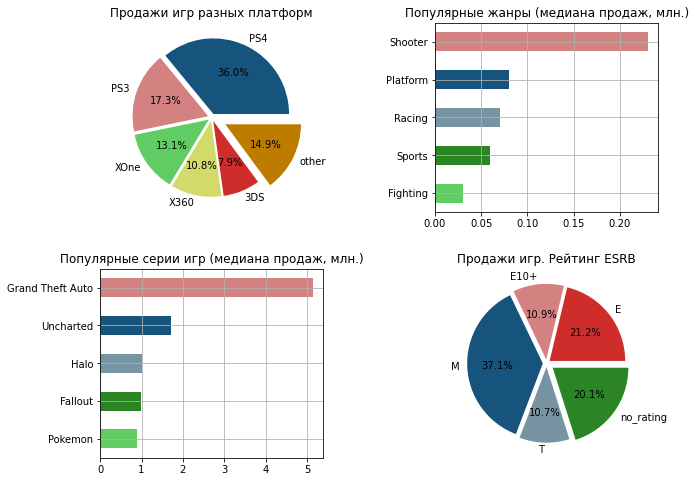

In [60]:
portrait('eu_sales')

Клиенты из Европы уважительно относятся к японской технике фирмы Sony. Больше половины обладают новой PS4 или реже PS3. Почти четверть клиентов играют на платформах от Мicrosoft (XOne и X360). Они любят те же игры, что и в Америке. Разве что только больше любят гонять по живописным альпийским трассам на феррари. В Европе тоже на первом месте GTA. Вообще, эти две группы из Америки и Европы очень похожи друг на друга.

### <font color='navy'>Портрет клиента из Японии</font>

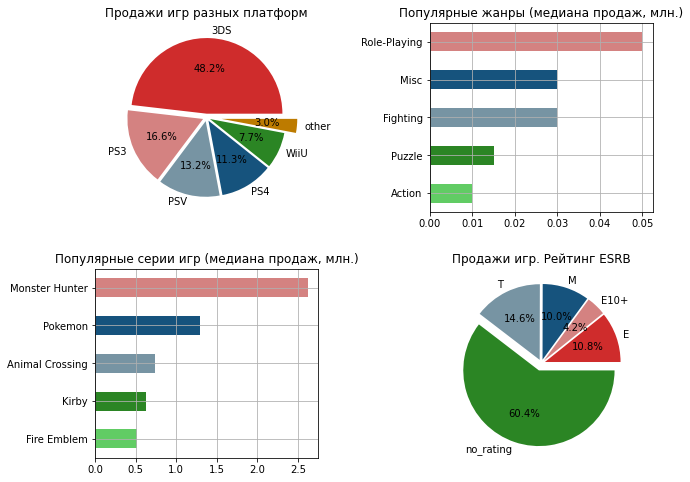

In [61]:
portrait('jp_sales')

Если в Америке и Европе играют почти одинаково, в Японии абсолютно другие предпочтения. Почти половина клиентов пользуются платформой Nintendo 3DS. Стоит отметить, что в Японии поддерживают своих производителей Nintendo и Sony. И PSV здесь ещё используют. Играют в подавляющем большинстве в ролевые игры Role-Plaing и Miscellaneous. Shooter и Sport не вошли в пятёрку лидеров. Наверное почти нет людей в Японии, которые бы не любили драконов из Monster Hunter, Покемонов и милых зверюшек Animal Crossing. Японцы - они как дети! Игры для взрослых здесь мало популярны, а в рейтингах их игры не участвуют. Скорее всего игры, переведённые на японский, не подают заявки на получение американского рейтинга. Возможно в этой стране есть свои категории.

### <font color='navy'>Портрет клиентов других стран</font>

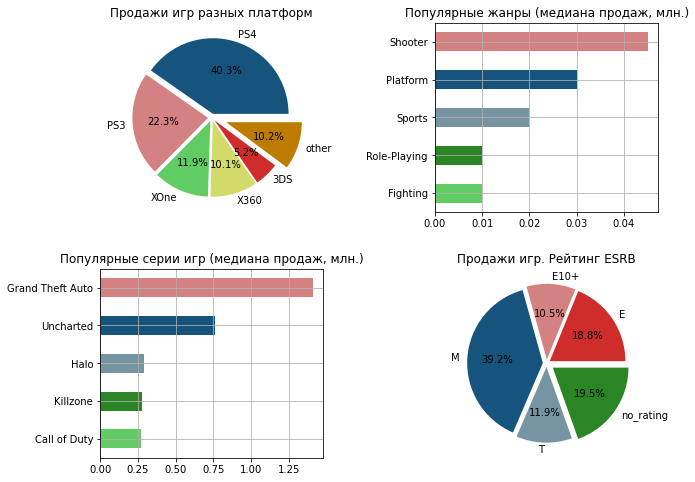

In [62]:
portrait('other_sales')

Раз уж есть удобная функция - нарисовали графики и для других стран. Описывать не будем. Результаты похожи на перемешанные вместе значения для Америки и Европы. Никаких интересных особенностей здесь не наблюдается. Разве что кроме огромной популярности PS4 и PS3.

## Проверка гипотез

### <font color='navy'>Оценки XOne и PC</font>

Предположим, что пользовательские оценки игр для платформ XboxOne и PC имеют одинаковые средние значения. Проверим эту гипотезу.
- cравнивать будем только за актуальный период, так как XOne появилась в 2013 году;
- исключим нулевые значения (бывшие пропуски);
- вспомним, что мы умножили все значения столбца user_score на 10, когда решили поменять тип данных на целочисленный. Поэтому при рассчёте медиан и дисперсии разделим оценки на 10. Это никак не повлияет на результат, но оценки будут выглядеть как изначально. 

Определим нулевую и альтернативную гипотезы и статистический уровень значимости.

\begin{aligned}
&Н_0=\text{"Средние значения оценок пользователей XOne и PC равны"}\\
&Н_1=\text{"Средние значения оценок пользователей XOne и PC разные"}\\
&\alpha=0.05
\end{aligned}

In [63]:
# найдем медианы выборок
print('Медиана выборки для XOne: \033[1m',
      round(df.query('year>2012 & platform=="XOne" & user_score>0')['user_score'].median()/10, 4), '\033[0m')
print('Медиана выборки для PC:   \033[1m',
      round(df.query('year>2012 & platform=="PC" & user_score>0')['user_score'].median()/10, 4), '\033[0m')
print()

# найдем дисперсии выборок
print('Дисперсия выборки для XOne:\033[1m',
      round(np.var(df.query('year>2012 & platform=="XOne" & user_score>0')['user_score']/10, 
                   ddof=1), 4), '\033[0m')
print('Дисперсия выборки для PC:  \033[1m',
      round(np.var(df.query('year>2012 & platform=="PC" & user_score>0')['user_score']/10, 
                   ddof=1), 4), '\033[0m')
print()

# определим гипотезы и уровень значимости
alpha = 0.05
H0 = 'Средние значения оценок пользователей XOne и PC равны'
H1 = 'Средние значения оценок пользователей XOne и PC разные'

# проведём t-тест для двух выборок, укажем что дисперсии разные 
results = st.ttest_ind(df.query('year>2012 & platform=="XOne" & user_score>0')['user_score'], 
                       df.query('year>2012 & platform=="PC" & user_score>0')['user_score'], 
                       equal_var = False)

print('p-значение: \033[1m', round(results.pvalue, 2), '\033[0m')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
    print('Вывод: \033[1m', H1, '\033[0m с вероятностью ', 1-round(results.pvalue, 2))
else:
    print('Не получилось отвергнуть нулевую гипотезу.') 
    print('Вывод: \033[1m', H0, '\033[0m с вероятностью ', 1-round(results.pvalue, 2))

Медиана выборки для XOne:  6.8 
Медиана выборки для PC:    6.8 

Дисперсия выборки для XOne: 1.907 
Дисперсия выборки для PC:   2.9979 

p-значение:  0.14 
Не получилось отвергнуть нулевую гипотезу.
Вывод:  Средние значения оценок пользователей XOne и PC равны  с вероятностью  0.86


### <font color='navy'>Оценки игр Action и Sports</font>

Предположим, что средние пользовательские оценки для игр жанров Action и Sports разные. Как и в предыдущем пункте, исключим все нулевые значения (бывшие пропуски в данных).

Определим нулевую и альтернативную гипотезы и статистический уровень значимости.

\begin{aligned}
&Н_0=\text{"Средние значения оценок пользователей для игр жанров Action и Sports равны"}\\
&Н_1=\text{"Средние значения оценок пользователей для игр жанров Action и Sports  разные"}\\
&\alpha=0.01
\end{aligned}

#### Для актуального периода

Проверим сначала для актуального периода 2013-2016гг. Если вспомнить портреты пользователей разных регионов, то Action гораздо популярнее, чем Sports. И скорее всего средние значения всё же разные, пользователи предпочитают в последнее время экшн. 

In [64]:
# найдем медианы выборок
print('Медиана выборки для Action: \033[1m',
      round(df.query('year>2012 & genre=="Action" & user_score>0')['user_score'].median()/10, 4), '\033[0m')
print('Медиана выборки для Sports:   \033[1m',
      round(df.query('year>2012 & genre=="Sports" & user_score>0')['user_score'].median()/10, 4), '\033[0m')
print()

# найдем дисперсии выборок
print('Дисперсия выборки для Action:\033[1m',
      round(np.var(df.query('year>2012 & genre=="Action" & user_score>0')['user_score']/10, 
                   ddof=1), 4), '\033[0m')
print('Дисперсия выборки для Sports:  \033[1m',
      round(np.var(df.query('year>2012 & genre=="Sports" & user_score>0')['user_score']/10, 
                   ddof=1), 4), '\033[0m')
print()

# определим гипотезы и уровень значимости
alpha = 0.01
H0 = 'Средние значения оценок для Action и Sports равны'
H1 = 'Средние значения оценок для Action и Sports разные'

# проведём t-тест для двух выборок, укажем что дисперсии разные 
results = st.ttest_ind(df.query('year>2012 & genre=="Action" & user_score>0')['user_score'], 
                       df.query('year>2012 & genre=="Sports" & user_score>0')['user_score'], 
                       equal_var = False)

print('p-значение: \033[1m', results.pvalue, '\033[0m')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
    print('Вывод: \033[1m', H1, '\033[0m с вероятностью ', 1-round(results.pvalue, 2))
else:
    print('Не получилось отвергнуть нулевую гипотезу.') 
    print('Вывод: \033[1m', H0, '\033[0m с вероятностью ', 1-round(results.pvalue, 2))

Медиана выборки для Action:  7.1 
Медиана выборки для Sports:    5.5 

Дисперсия выборки для Action: 1.7639 
Дисперсия выборки для Sports:   3.1806 

p-значение:  1.6948835429264077e-20 
Отвергаем нулевую гипотезу.
Вывод:  Средние значения оценок для Action и Sports разные  с вероятностью  1.0


#### Для всего периода наблюдений

Конечно, нас в первую очередь интересует актуальный период. Но всё же проверим ту же гипотезу для всех данных. И если в случае с ХOne и PC некорректно было бы их сравнивать за весь период, так как у них абсолютно разный возраст, то жанры мы можем сравнить таким образом. Возраст всех жанров 35-36 лет. 

In [65]:
# найдем медианы выборок
print('Медиана выборки для Action: \033[1m',
      round(df.query('genre=="Action" & user_score>0')['user_score'].median()/10, 4), '\033[0m')
print('Медиана выборки для Sports:   \033[1m',
      round(df.query('genre=="Sports" & user_score>0')['user_score'].median()/10, 4), '\033[0m')
print()

# найдем дисперсии выборок
print('Дисперсия выборки для Action:\033[1m',
      round(np.var(df.query('genre=="Action" & user_score>0')['user_score']/10, 
                   ddof=1), 4), '\033[0m')
print('Дисперсия выборки для Sports:  \033[1m',
      round(np.var(df.query('genre=="Sports" & user_score>0')['user_score']/10, 
                   ddof=1), 4), '\033[0m')
print()

# определим гипотезы и уровень значимости
alpha = 0.01
H0 = 'Средние значения оценок для Action и Sports равны'
H1 = 'Средние значения оценок для Action и Sports разные'

# проведём t-тест для двух выборок, укажем что дисперсии разные 
results = st.ttest_ind(df.query('genre=="Action" & user_score>0')['user_score'], 
                       df.query('genre=="Sports" & user_score>0')['user_score'], 
                       equal_var = False)

print('p-значение: \033[1m', round(results.pvalue,2), '\033[0m')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
    print('Вывод: \033[1m', H1, '\033[0m с вероятностью ', 1-round(results.pvalue, 2))
else:
    print('Не получилось отвергнуть нулевую гипотезу.') 
    print('Вывод: \033[1m', H0, '\033[0m с вероятностью ', 1-round(results.pvalue, 2))

Медиана выборки для Action:  7.4 
Медиана выборки для Sports:    7.4 

Дисперсия выборки для Action: 2.0183 
Дисперсия выборки для Sports:   2.6066 

p-значение:  0.1 
Не получилось отвергнуть нулевую гипотезу.
Вывод:  Средние значения оценок для Action и Sports равны  с вероятностью  0.9


### <font color='navy'>Итоги проверки гипотез</font>

- Средние значения оценок пользователей XOne и PC:
    - за актуальный период с 2013 по 2016гг. равны  с вероятностью  86%.
- Средние значения оценок для Action и Sports:
    - за актуальный период разные  с вероятностью  100%;
    - за весь период наблюдений равны  с вероятностью  91%.
    
Причины того, что так отличаются оценки в последнее время и за всё время существования игр, могут быть следующие: 
- Раньше больше любили спортивные игры и они выше оценивались пользователями. Сейчас клиенты ждут более увлекательных и захватывающих впечатлений, обычные спортивные игры им уже не интересны. Т.е. клиенты стали более избалованными.
- Ну или сейчас хорошие спортивные игры не появляются, все усилия по созданию новинок в угоду клиентам направлены на популярные жанры. Поэтому и оценки спортивных игр ниже. 

## Общий вывод


<font color='navy' style='font-size:16px'>**Портрет клиента**</font>

Чтобы проще было описать полученные результаты, выведем информацию о тех играх, которые лучше всего продавались за последние 4 года (с 2013 по 2016 гг.) по всем регионам

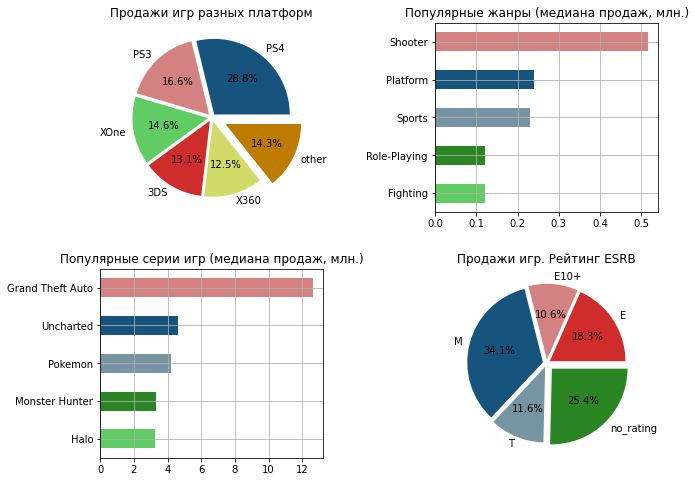

In [66]:
portrait('global_sales')

<font color='navy' style='font-size:16px'>**Критерии выбора потенциально популярных игр**</font>


**1. Платформы** (кроме Японии)
- Самой популярной во всех регионах является консоль **Play Station 4** компании Sony. Релизы и продажи игр для этой платформы продолжают постепенно расти, поэтому они могут занять основную часть рынка. Для третьей модели Play Station, которая была популярна ранее, релизы уже не выходят, продажи почти полностью упали.
- Вторая набирающая продажи в мире **Xbox One** от Microsoft популярна в Америке и Европе. Поддержка её предшественницы Xbox 360 приостановлена. 
- Nintendo постепенно сокращает выпуск новых игр для своей **3DS**, популярность этой консоли в мире не превышала 8%. 
- Играми для WiiU  не следует сильно запасаться. Очень похоже, что эта приставка постепенно уходит с рынка. Также как и портативная Play Station Vita, которую уже активно заменили смартфоны. 
- Не стоит исключать из ассортимента обычные компьютерные игры (**РС**). В отличие от игровых платформ, компьютеры и ноутбуки есть практически в каждом доме. Количество релизов и продаж невелико, но зато постоянно и пока не показывает склонности к снижению. 
    

**2. Жанры, серии и рейтинг игр** (кроме Японии)
- Хорошо будут продаваться любые "стрелялки" для взрослых, платформенные и спортивные игры. Не стоит рассчитывать на хорошие продажи пазлов, приключений и стратегий. 
- Следует внимательно следить за выходом новых серий популярных игр. В последние 4 года игры, которые являлись серией или продолжением известных игр, имели среднее значение продаж в 3 раза больше, чем все остальные. Самыми продаваемыми во всех странах стали такие игры, как Call of Duty и Grand Theft Auto. В первую десятку вошли также Final Fantasy, Assassin's Creed, Tom Clancy's. А самыми популярными опять же GTA, Uncharted и Покемоны.
- Из рейтингов лучше всего продаются игры для взрослых (М) и игры рейтинга для всех (Е). 
    

**3. Оценки пользователей и критиков**
- Зависимость количества продаж от оценок критиков или пользователей не выявлена. 
- Замечена такая особенность - чем старше платформа, тем большее влияние на продажу игр оказывают оценки пользователей. Влияние это всё же незначительное. Возможно, это связано также с тем, что для новых игр оценки пользователей еще не рассчитаны. Поэтому коэффициенты корелляции близки к нулю. Тогда как оценки критиков могут появляться раньше.
    
    
**4. Японский рынок**
- занимают исключительно игры для Nintendo и Sony. Особенно популярной в последние 4 года была **3DS**. Но так как количество релизов и продаж для этой платфомы продолжает падать, возможно, что и в Японии эти показатели будут снижаться. 
- Для продажи в Японии следует выбирать по большей части ролевые игры с милыми и хорошо "раскрученными" персонажами. Сейчас это Monster Hunter и Покемоны. Конечно, их может сменить кто-то другой, более популярный, но тоже хорошенький. Потому что взрослые игры японцы не очень любят. И на рейтинг здесь не стоит опираться. 
  
<hr>
В целом перспектива рынка компьютерных игр не радужная. Релизы и продажи снижаются для всех платформ и компаний-производителей. Учитывая такую ситуацию, возможно стоит рассмотреть дополнительные возможности продажи игр для смартфонов или популярных игр прошлых лет для консолей, которые остались у многих клиентов. 